# problem Statement

In [1]:
#X1 - ROA(C) before interest and depreciation before interest: Return On Total Assets(C)
#X2 - ROA(A) before interest and % after tax: Return On Total Assets(A)
#X3 - ROA(B) before interest and depreciation after tax: Return On Total Assets(B)
#X4 - Operating Gross Margin: Gross Profit/Net Sales
#X5 - Realized Sales Gross Margin: Realized Gross Profit/Net Sales
#X6 - Operating Profit Rate: Operating Income/Net Sales
#X7 - Pre-tax net Interest Rate: Pre-Tax Income/Net Sales
#X8 - After-tax net Interest Rate: Net Income/Net Sales
#X9 - Non-industry income and expenditure/revenue: Net Non-operating Income Ratio
#X10 - Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales
#X11 - Operating Expense Rate: Operating Expenses/Net Sales
#X12 - Research and development expense rate: (Research and Development Expenses)/Net Sales
#X13 - Cash flow rate: Cash Flow from Operating/Current Liabilities
#X14 - Interest-bearing debt interest rate: Interest-bearing Debt/Equity
#X15 - Tax rate (A): Effective Tax Rate
#X16 - Net Value Per Share (B): Book Value Per Share(B)
#X17 - Net Value Per Share (A): Book Value Per Share(A)
#X18 - Net Value Per Share (C): Book Value Per Share(C)
#X19 - Persistent EPS in the Last Four Seasons: EPS-Net Income
#X20 - Cash Flow Per Share
#X21 - Revenue Per Share (Yuan ¥): Sales Per Share
#X22 - Operating Profit Per Share (Yuan ¥): Operating Income Per Share
#X23 - Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share
#X24 - Realized Sales Gross Profit Growth Rate
#X25 - Operating Profit Growth Rate: Operating Income Growth
#X26 - After-tax Net Profit Growth Rate: Net Income Growth
#X27 - Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth
#X28 - Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth
#X29 - Total Asset Growth Rate: Total Asset Growth
#X30 - Net Value Growth Rate: Total Equity Growth
#X31 - Total Asset Return Growth Rate Ratio: Return on Total Asset Growth
#X32 - Cash Reinvestment %: Cash Reinvestment Ratio
#X33 - Current Ratio
#X34 - Quick Ratio: Acid Test
#X35 - Interest Expense Ratio: Interest Expenses/Total Revenue
#X36 - Total debt/Total net worth: Total Liability/Equity Ratio
#X37 - Debt ratio %: Liability/Total Assets
#X38 - Net worth/Assets: Equity/Total Assets
#X39 - Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets
#X40 - Borrowing dependency: Cost of Interest-bearing Debt
#X41 - Contingent liabilities/Net worth: Contingent Liability/Equity
#X42 - Operating profit/Paid-in capital: Operating Income/Capital
#X43 - Net profit before tax/Paid-in capital: Pretax Income/Capital
#X44 - Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity
#X45 - Total Asset Turnover
#X46 - Accounts Receivable Turnover
#X47 - Average Collection Days: Days Receivable Outstanding
#X48 - Inventory Turnover Rate (times)
#X49 - Fixed Assets Turnover Frequency
#X50 - Net Worth Turnover Rate (times): Equity Turnover
#X51 - Revenue per person: Sales Per Employee
#X52 - Operating profit per person: Operation Income Per Employee
#X53 - Allocation rate per person: Fixed Assets Per Employee
#X54 - Working Capital to Total Assets
#X55 - Quick Assets/Total Assets
#X56 - Current Assets/Total Assets
#X57 - Cash/Total Assets
#X58 - Quick Assets/Current Liability
#X59 - Cash/Current Liability
#X60 - Current Liability to Assets
#X61 - Operating Funds to Liability
#X62 - Inventory/Working Capital
#X63 - Inventory/Current Liability
#X64 - Current Liabilities/Liability
#X65 - Working Capital/Equity
#X66 - Current Liabilities/Equity
#X67 - Long-term Liability to Current Assets
#X68 - Retained Earnings to Total Assets
#X69 - Total income/Total expense
#X70 - Total expense/Assets
#X71 - Current Asset Turnover Rate: Current Assets to Sales
#X72 - Quick Asset Turnover Rate: Quick Assets to Sales
#X73 - Working capitcal Turnover Rate: Working Capital to Sales
#X74 - Cash Turnover Rate: Cash to Sales
#X75 - Cash Flow to Sales
#X76 - Fixed Assets to Assets
#X77 - Current Liability to Liability
#X78 - Current Liability to Equity
#X79 - Equity to Long-term Liability
#80 - Cash Flow to Total Assets
#X81 - Cash Flow to Liability
#X82 - CFO to Assets
#X83 - Cash Flow to Equity
#X84 - Current Liability to Current Assets
#X85 - Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise
#X86 - Net Income to Total Assets
#X87 - Total assets to GNP price
#X88 - No-credit Interval
#X89 - Gross Profit to Sales
#X90 - Net Income to Stockholder's Equity
#X91 - Liability to Equity
#X92 - Degree of Financial Leverage (DFL)
#X93 - Interest Coverage Ratio (Interest expense to EBIT)
#X94 - Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise
#X95 - Equity to Liability

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid',palette='viridis')
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.stats import norm
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Arifkhd/bankruptcy-prediction/refs/heads/main/Bankruptcy%20Prediction.csv")
df

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

In [4]:
df.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

In [5]:
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [6]:
df.tail()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
6814                      0.809331   
6815                      0.809327   
6816                      0.809317   
6817                      0.809399   
6818                      0.813800   

       Non-industry income and expenditure/revenue  ...  \
6814                                      0.303510  ...   
6815                                      0.303520  ...   
6816                                      0.303512  ...   
6817                                      0.303498  ...   
6818                                      0.313415  ...   

       Net Income to Total Assets   Total assets to GNP price  \
6814                     0.799927                    0.000466   
6815                     0.799748                    0.001959   
6816                     0.797778                    0.002840   
6817                     0.811808                    0.002837   
6818                     0.815956                    0.000707   

       No-credit Interval   Gross Profit to Sales  \
6814             0.623620                0.604455   
6815             0.623931                0.598306   
6816             0.624156                0.610441   
6817             0.623957                0.607846   
6818             0.626680                0.627408   

       Net Income to Stockholder's Equity   Liability to Equity  \
6814                             0.840359              0.279606   
6815                             0.840306              0.278132   
6816                             0.840138              0.275789   
6817                             0.841084              0.277547   
6818                             0.841019              0.275114   

       Degree of Financial Leverage (DFL)  \
6814                             0.027064   
6815                             0.027009   
6816                             0.026791   
6817                             0.026822   
6818                             0.026793   

       Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
6814                                           0.566193                   1   
6815                 

In [7]:
df.shape

(6819, 96)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [9]:
df.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

In [10]:
df.columns = [c.replace(' ', '_') for c in df.columns]
df.head()

Bankrupt?  _ROA(C)_before_interest_and_depreciation_before_interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

   _ROA(A)_before_interest_and_%_after_tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

   _ROA(B)_before_interest_and_depreciation_after_tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

   _Operating_Gross_Margin  _Realized_Sales_Gross_Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

   _Operating_Profit_Rate  _Pre-tax_net_Interest_Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

   _After-tax_net_Interest_Rate  _Non-industry_income_and_expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...  _Net_Income_to_Total_Assets  _Total_assets_to_GNP_price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

   _No-credit_Interval  _Gross_Profit_to_Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

   _Net_Income_to_Stockholder's_Equity  _Liability_to_Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

   _Degree_of_Financial_Leverage_(DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

   _Interest_Coverage_Ratio_(Interest_expense_to_EBIT)  _Net_Income_Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1   _ROA(C)_before_interest_and_depreciation_before_interest  6819 non-null   float64
 2   _ROA(A)_before_interest_and_%_after_tax                   6819 non-null   float64
 3   _ROA(B)_before_interest_and_depreciation_after_tax        6819 non-null   float64
 4   _Operating_Gross_Margin                                   6819 non-null   float64
 5   _Realized_Sales_Gross_Margin                              6819 non-null   float64
 6   _Operating_Profit_Rate                                    6819 non-null   float64
 7   _Pre-tax_net_Interest_Rate                                6819 non-null   float64
 8   _After-tax_net_Int

In [12]:
df['Bankrupt?'].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

In [13]:
print('Financially stable: ', round(df['Bankrupt?'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Financially unstable: ', round(df['Bankrupt?'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Financially stable:  96.77 % of the dataset
Financially unstable:  3.23 % of the dataset


# Data Distribution:

In [14]:
#Central Tendency: Calculate mean, median, and mode using .mean(), .median(), and .mode().
df.mean()

Bankrupt?                                                   0.032263
_ROA(C)_before_interest_and_depreciation_before_interest    0.505180
_ROA(A)_before_interest_and_%_after_tax                     0.558625
_ROA(B)_before_interest_and_depreciation_after_tax          0.553589
_Operating_Gross_Margin                                     0.607948
                                                              ...   
_Liability_to_Equity                                        0.280365
_Degree_of_Financial_Leverage_(DFL)                         0.027541
_Interest_Coverage_Ratio_(Interest_expense_to_EBIT)         0.565358
_Net_Income_Flag                                            1.000000
_Equity_to_Liability                                        0.047578
Length: 96, dtype: float64

In [15]:
df.median()

Bankrupt?                                                   0.000000
_ROA(C)_before_interest_and_depreciation_before_interest    0.502706
_ROA(A)_before_interest_and_%_after_tax                     0.559802
_ROA(B)_before_interest_and_depreciation_after_tax          0.552278
_Operating_Gross_Margin                                     0.605997
                                                              ...   
_Liability_to_Equity                                        0.278778
_Degree_of_Financial_Leverage_(DFL)                         0.026808
_Interest_Coverage_Ratio_(Interest_expense_to_EBIT)         0.565252
_Net_Income_Flag                                            1.000000
_Equity_to_Liability                                        0.033798
Length: 96, dtype: float64

In [16]:
#Dispersion: Analyze the spread of data using .var() for variance and .std() for standard deviation.
df.var()

Bankrupt?                                                   3.122649e-02
_ROA(C)_before_interest_and_depreciation_before_interest    3.682747e-03
_ROA(A)_before_interest_and_%_after_tax                     4.305988e-03
_ROA(B)_before_interest_and_depreciation_after_tax          3.793921e-03
_Operating_Gross_Margin                                     2.867540e-04
                                                                ...     
_Liability_to_Equity                                        2.091848e-04
_Degree_of_Financial_Leverage_(DFL)                         2.454844e-04
_Interest_Coverage_Ratio_(Interest_expense_to_EBIT)         1.746161e-04
_Net_Income_Flag                                            1.232776e-32
_Equity_to_Liability                                        2.501372e-03
Length: 96, dtype: float64

In [17]:
df.std()

Bankrupt?                                                   1.767102e-01
_ROA(C)_before_interest_and_depreciation_before_interest    6.068564e-02
_ROA(A)_before_interest_and_%_after_tax                     6.562003e-02
_ROA(B)_before_interest_and_depreciation_after_tax          6.159481e-02
_Operating_Gross_Margin                                     1.693381e-02
                                                                ...     
_Liability_to_Equity                                        1.446322e-02
_Degree_of_Financial_Leverage_(DFL)                         1.566794e-02
_Interest_Coverage_Ratio_(Interest_expense_to_EBIT)         1.321424e-02
_Net_Income_Flag                                            1.110304e-16
_Equity_to_Liability                                        5.001372e-02
Length: 96, dtype: float64

In [18]:
#Skewness: Determine the skewness using .skew() to see if the data is left or right skewed.
df.skew()

Bankrupt?                                                    5.295388
_ROA(C)_before_interest_and_depreciation_before_interest    -0.323941
_ROA(A)_before_interest_and_%_after_tax                     -1.033727
_ROA(B)_before_interest_and_depreciation_after_tax          -0.763564
_Operating_Gross_Margin                                     -8.043368
                                                              ...    
_Liability_to_Equity                                        27.459467
_Degree_of_Financial_Leverage_(DFL)                         45.724197
_Interest_Coverage_Ratio_(Interest_expense_to_EBIT)        -13.939528
_Net_Income_Flag                                             0.000000
_Equity_to_Liability                                         7.401101
Length: 96, dtype: float64

In [19]:
#Kurtosis: Use .kurtosis() to assess the "tailedness" of the distribution.
#Computes the kurtosis of the data. A positive kurtosis indicates a distribution with heavy tails and a sharp peak, while a negative kurtosis indicates a flatter distribution.
df.kurtosis()

Bankrupt?                                                     26.048769
_ROA(C)_before_interest_and_depreciation_before_interest       6.390770
_ROA(A)_before_interest_and_%_after_tax                        9.038785
_ROA(B)_before_interest_and_depreciation_after_tax             7.929074
_Operating_Gross_Margin                                      365.540671
                                                               ...     
_Liability_to_Equity                                        1209.203491
_Degree_of_Financial_Leverage_(DFL)                         2475.433404
_Interest_Coverage_Ratio_(Interest_expense_to_EBIT)          911.800905
_Net_Income_Flag                                               0.000000
_Equity_to_Liability                                          94.066170
Length: 96, dtype: float64

# Check for Missing Values

In [20]:
df.isnull().sum()

Bankrupt?                                                   0
_ROA(C)_before_interest_and_depreciation_before_interest    0
_ROA(A)_before_interest_and_%_after_tax                     0
_ROA(B)_before_interest_and_depreciation_after_tax          0
_Operating_Gross_Margin                                     0
                                                           ..
_Liability_to_Equity                                        0
_Degree_of_Financial_Leverage_(DFL)                         0
_Interest_Coverage_Ratio_(Interest_expense_to_EBIT)         0
_Net_Income_Flag                                            0
_Equity_to_Liability                                        0
Length: 96, dtype: int64

In [21]:
[print(col) for col in df if df[col].isna().sum() > 0]

[]

In [22]:
df.duplicated().sum()

0

# check the distribution of target column

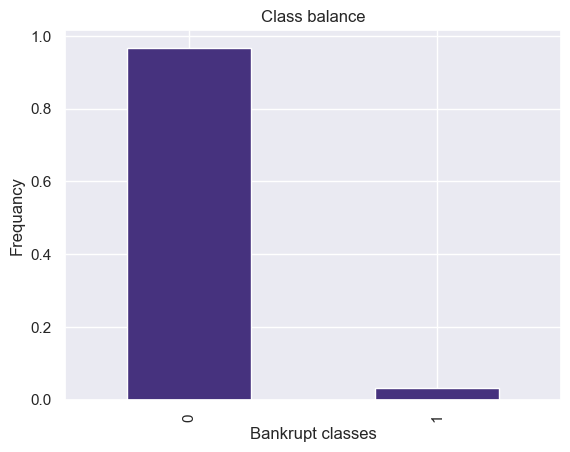

In [23]:
df['Bankrupt?'].value_counts(normalize= True).plot(kind= 'bar')
plt.xlabel("Bankrupt classes")
plt.ylabel("Frequancy")
plt.title("Class balance");

# EDA

In [24]:
df.hist(figsize = (100,105), bins = 50)
plt.show()

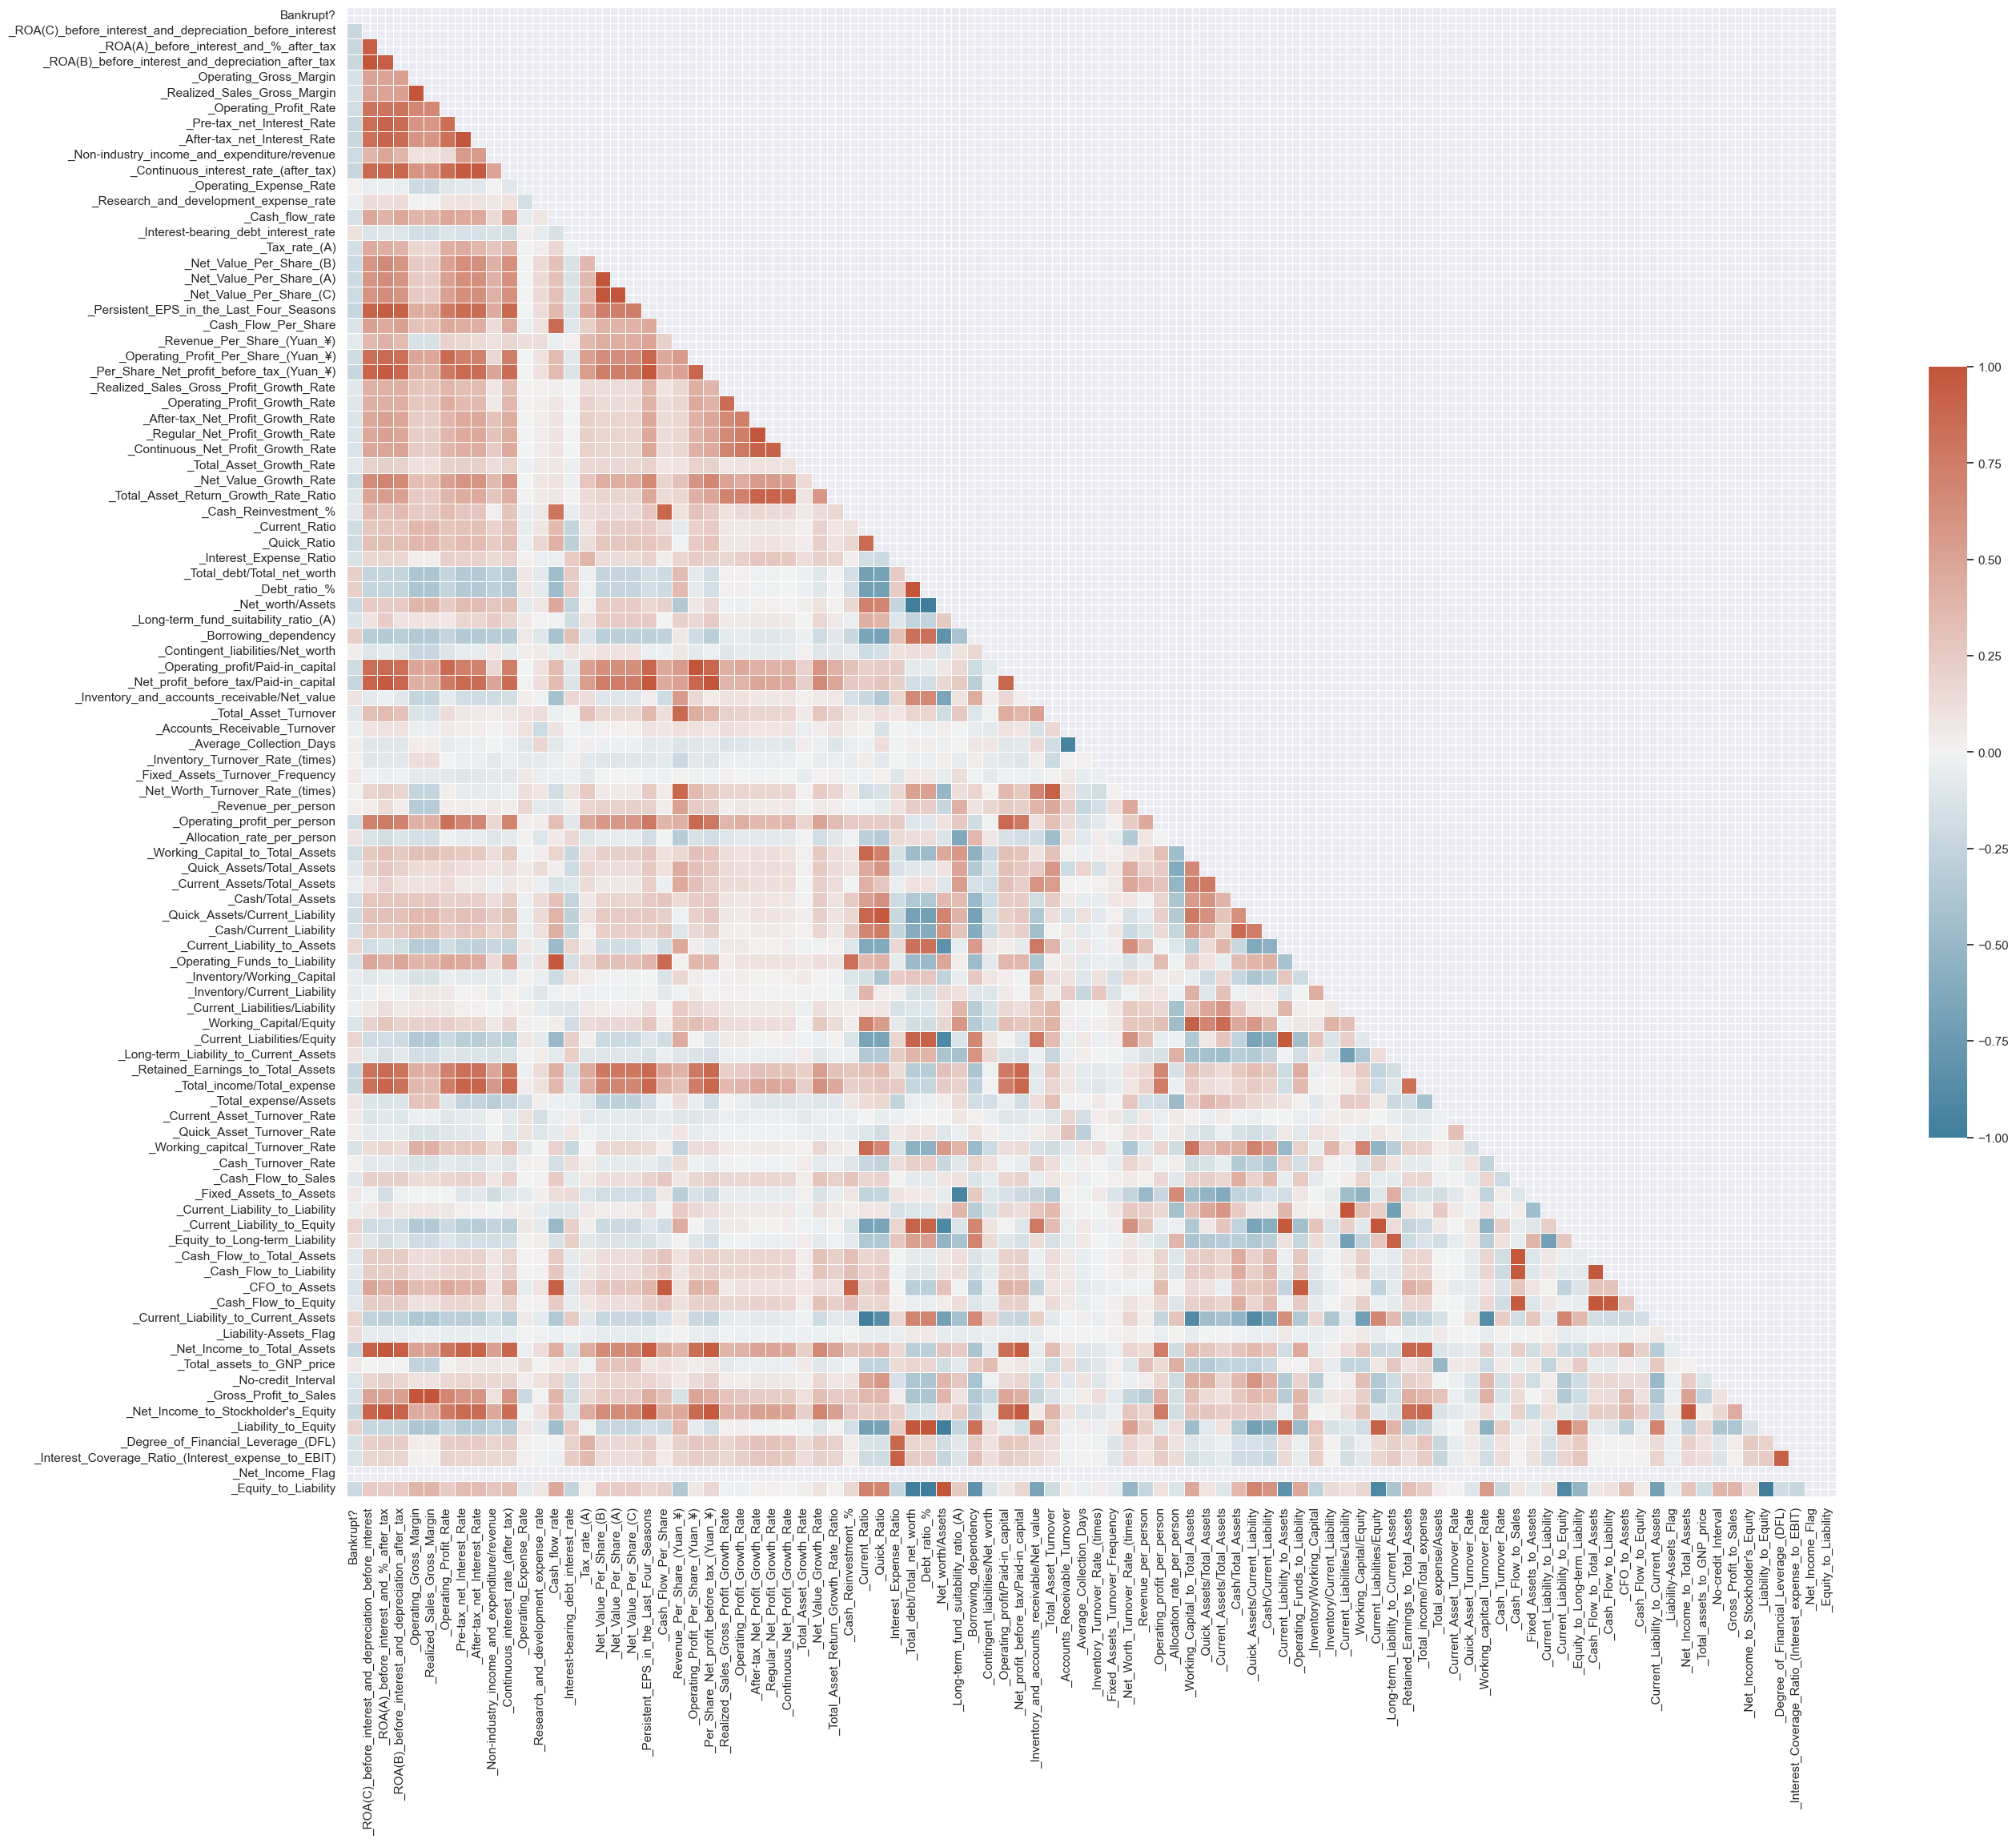

In [25]:
f, ax = plt.subplots(figsize=(30, 25))
mat = df.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

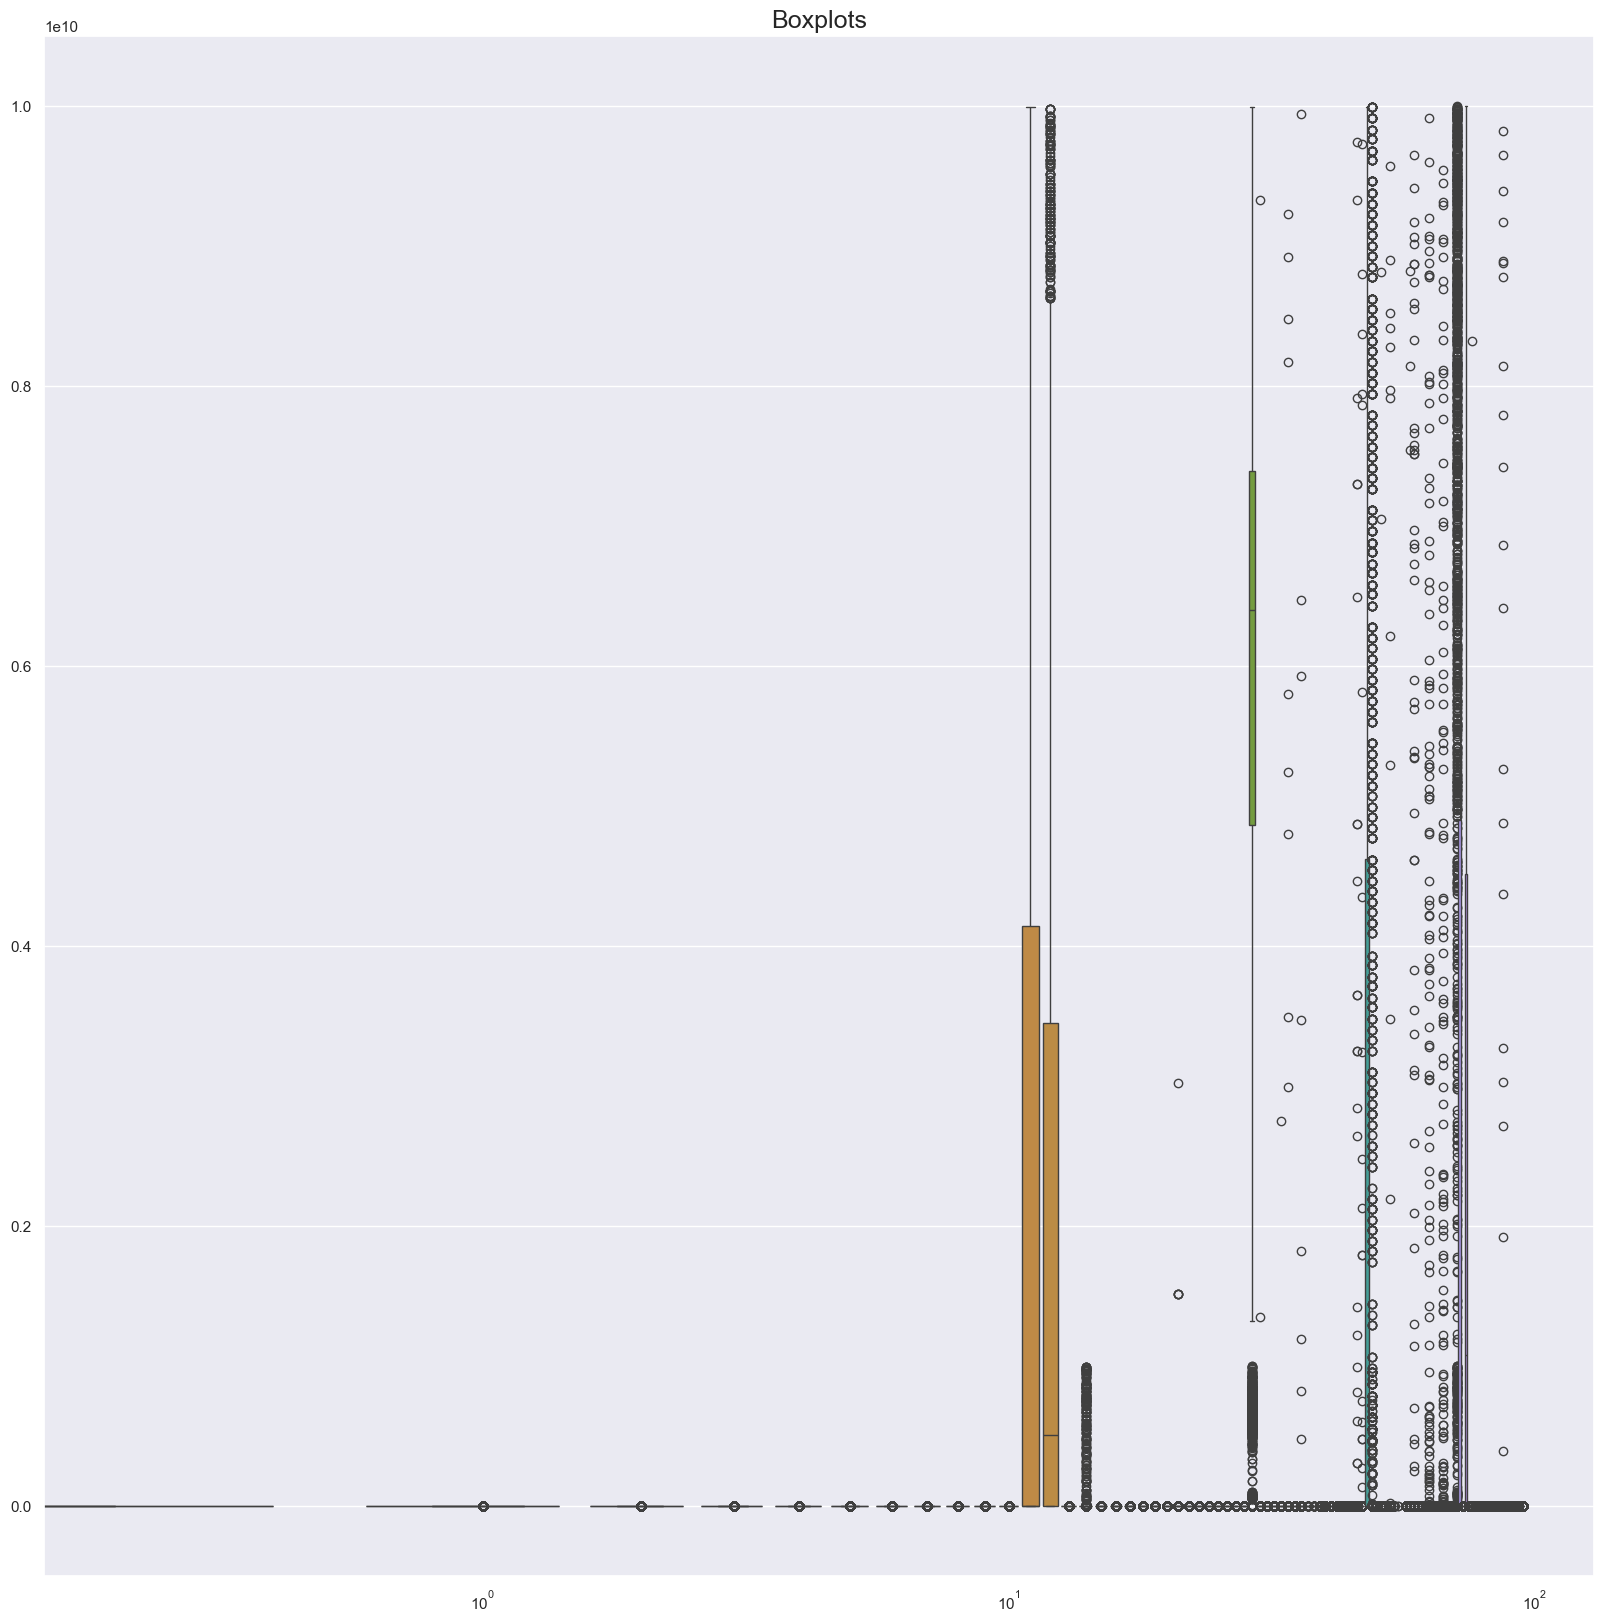

In [26]:
# Plotting Boxplots of the numerical features

plt.figure(figsize = (20,20))
ax =sns.boxplot(data = df, orient="v")
ax.set_title('Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

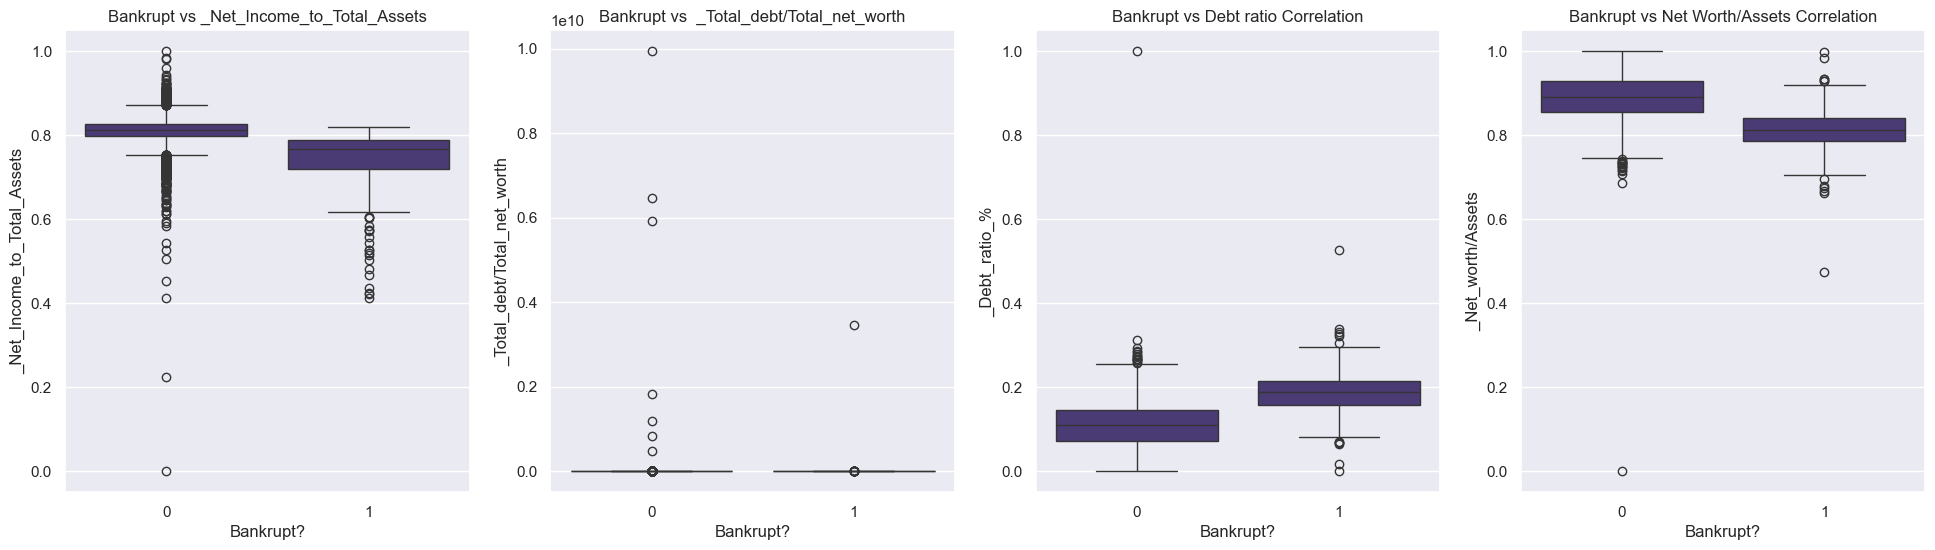

In [27]:
# Plotting interesting features

f, axes = plt.subplots(ncols=4, figsize=(24,6))

sns.boxplot(x='Bankrupt?', y="_Net_Income_to_Total_Assets", data=df, ax=axes[0])
axes[0].set_title('Bankrupt vs _Net_Income_to_Total_Assets')

sns.boxplot(x='Bankrupt?', y="_Total_debt/Total_net_worth", data=df, ax=axes[1]) 
axes[1].set_title('Bankrupt vs  _Total_debt/Total_net_worth')


sns.boxplot(x='Bankrupt?', y="_Debt_ratio_%", data=df, ax=axes[2])
axes[2].set_title('Bankrupt vs Debt ratio Correlation')


sns.boxplot(x='Bankrupt?', y="_Net_worth/Assets", data=df, ax=axes[3])  
axes[3].set_title('Bankrupt vs Net Worth/Assets Correlation') 

plt.show()

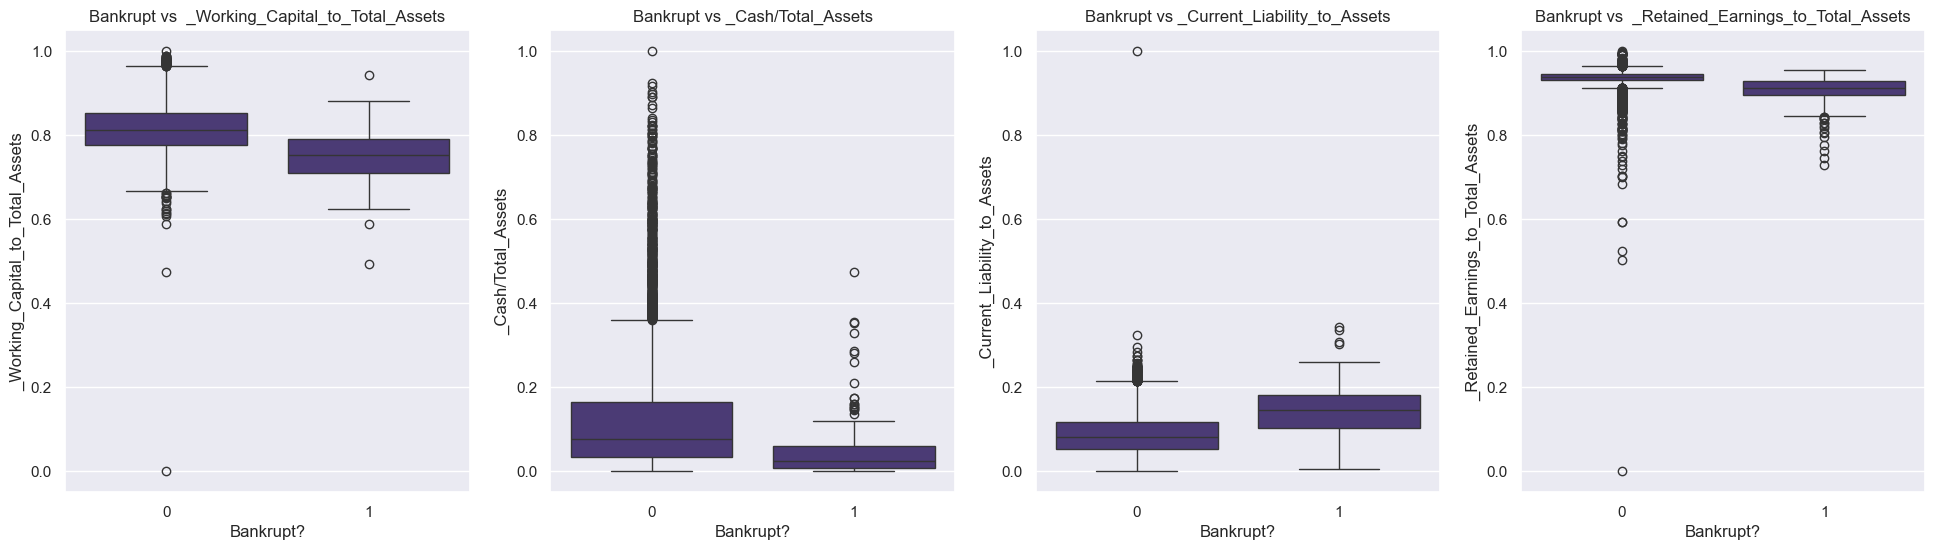

In [28]:
# Plotting other interesting features

f, axes = plt.subplots(ncols=4, figsize=(24,6))

sns.boxplot(x='Bankrupt?', y="_Working_Capital_to_Total_Assets", data=df, ax=axes[0])
axes[0].set_title('Bankrupt vs  _Working_Capital_to_Total_Assets')

sns.boxplot(x='Bankrupt?', y="_Cash/Total_Assets", data=df, ax=axes[1])
axes[1].set_title('Bankrupt vs _Cash/Total_Assets')


sns.boxplot(x='Bankrupt?', y="_Current_Liability_to_Assets", data=df, ax=axes[2])
axes[2].set_title('Bankrupt vs _Current_Liability_to_Assets')


sns.boxplot(x='Bankrupt?', y="_Retained_Earnings_to_Total_Assets", data=df, ax=axes[3])
axes[3].set_title('Bankrupt vs  _Retained_Earnings_to_Total_Assets')

plt.show()

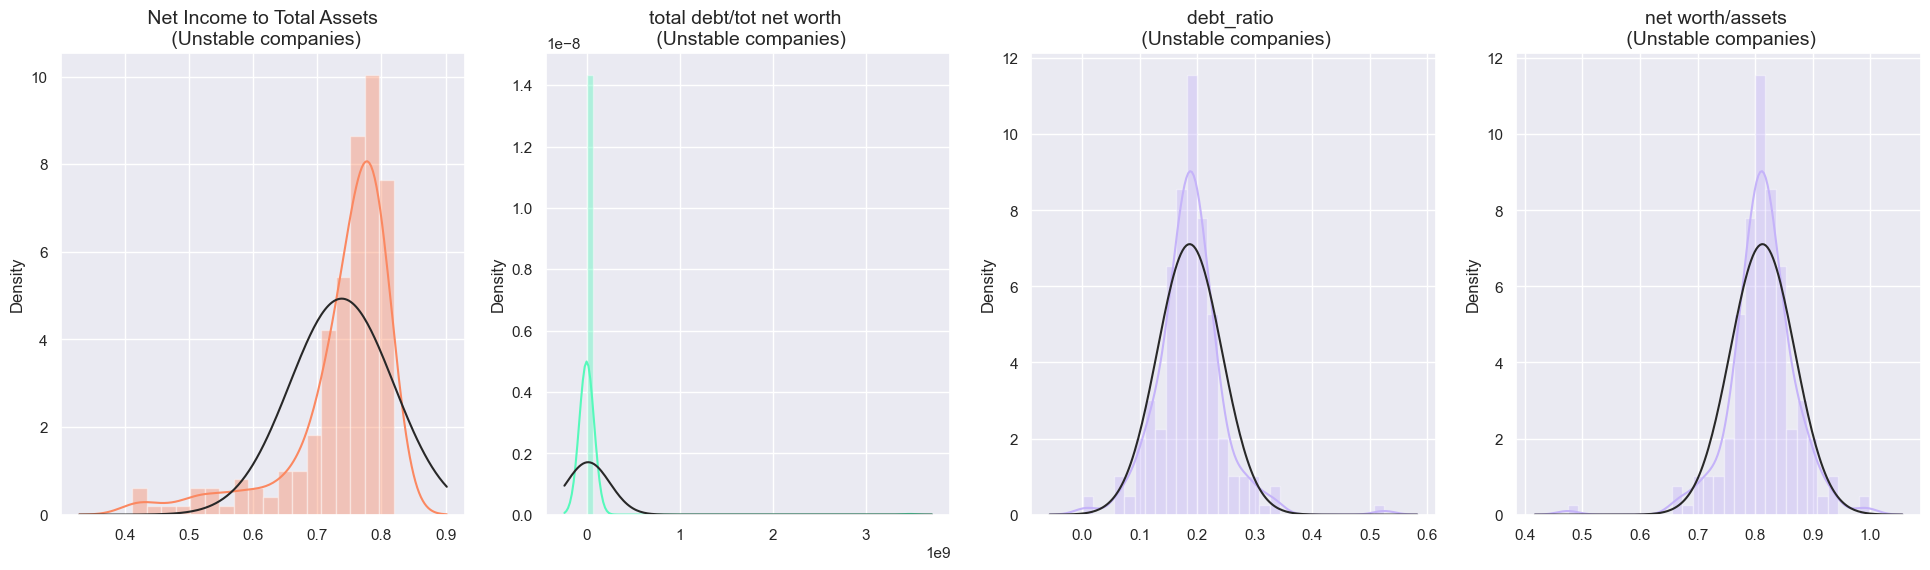

In [29]:
# Plotting the feature distributions for close to bankrputcy companies

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

cash_flow_rate = df['_Net_Income_to_Total_Assets'].loc[df['Bankrupt?'] == 1].values
sns.distplot(cash_flow_rate,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title(' Net Income to Total Assets \n (Unstable companies)', fontsize=14)

tot_debt_net = df['_Total_debt/Total_net_worth'].loc[df['Bankrupt?'] == 1].values
sns.distplot(tot_debt_net ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('total debt/tot net worth \n (Unstable companies)', fontsize=14)


debt_ratio = df['_Debt_ratio_%'].loc[df['Bankrupt?'] == 1].values
sns.distplot(debt_ratio,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('debt_ratio \n (Unstable companies)', fontsize=14)

net_worth_assets = df['_Net_worth/Assets'].loc[df['Bankrupt?'] == 1].values
sns.distplot(net_worth_assets,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('net worth/assets \n (Unstable companies)', fontsize=14)

plt.show()


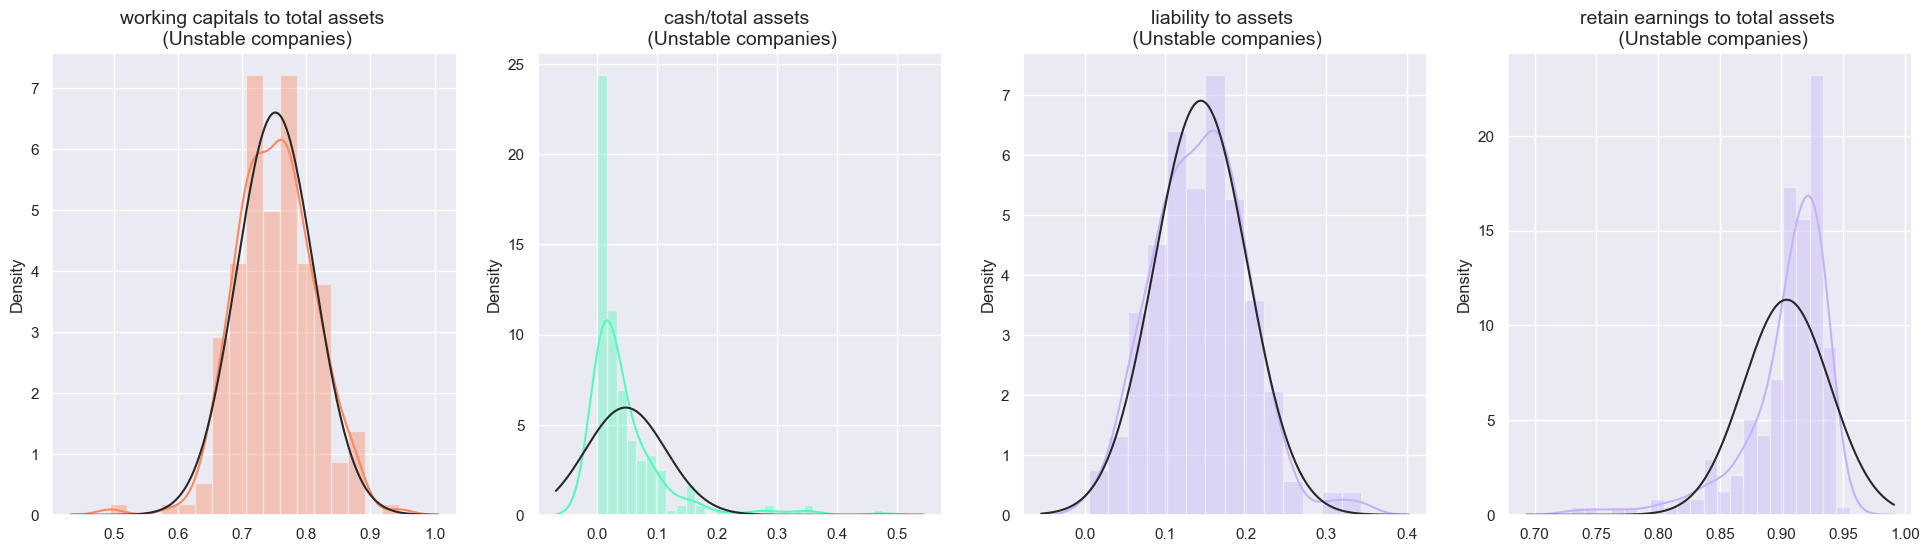

In [30]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

working_cap =df['_Working_Capital_to_Total_Assets'].loc[df['Bankrupt?'] == 1].values
sns.distplot(working_cap,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('working capitals to total assets \n (Unstable companies)', fontsize=14)

cash_tot_assets = df['_Cash/Total_Assets'].loc[df['Bankrupt?'] == 1].values
sns.distplot(cash_tot_assets ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('cash/total assets \n (Unstable companies)', fontsize=14)


asset_liab = df['_Current_Liability_to_Assets'].loc[df['Bankrupt?'] == 1].values
sns.distplot(asset_liab,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('liability to assets \n (Unstable companies)', fontsize=14)

operating_funds = df['_Retained_Earnings_to_Total_Assets'].loc[df['Bankrupt?'] == 1].values
sns.distplot(operating_funds,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('retain earnings to total assets \n (Unstable companies)', fontsize=14)

plt.show()

In [31]:
def outliers_removal(feature,feature_name,dataset):
    
    # Identify 25th & 75th quartiles

    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    feat_iqr = q75 - q25
    print('iqr: {}'.format(feat_iqr))
    
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name +' Lower: {}'.format(feat_lower))
    print(feature_name +' Upper: {}'.format(feat_upper))
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers for close to bankruptcy cases: {}'.format(len(outliers)))
    #print(feature_name + ' outliers:{}'.format(outliers))

    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    print('-' * 65)
    
    return dataset

for col in df:
    new_df = outliers_removal(df[col],str(col),df)
    

Quartile 25: 0.0 | Quartile 75: 0.0
iqr: 0.0
Cut Off: 0.0
Bankrupt? Lower: 0.0
Bankrupt? Upper: 0.0
Bankrupt? outliers for close to bankruptcy cases: 220
-----------------------------------------------------------------
Quartile 25: 0.476527080388047 | Quartile 75: 0.535562813825379
iqr: 0.05903573343733198
Cut Off: 0.08855360015599797
_ROA(C)_before_interest_and_depreciation_before_interest Lower: 0.38797348023204903
_ROA(C)_before_interest_and_depreciation_before_interest Upper: 0.624116413981377
_ROA(C)_before_interest_and_depreciation_before_interest outliers for close to bankruptcy cases: 391
-----------------------------------------------------------------
Quartile 25: 0.53554295682512 | Quartile 75: 0.58915721761884
iqr: 0.05361426079372
Cut Off: 0.08042139119058
_ROA(A)_before_interest_and_%_after_tax Lower: 0.45512156563454
_ROA(A)_before_interest_and_%_after_tax Upper: 0.66957860880942
_ROA(A)_before_interest_and_%_after_tax outliers for close to bankruptcy cases: 561
-------

-----------------------------------------------------------------
Quartile 25: 1.0 | Quartile 75: 1.0
iqr: 0.0
Cut Off: 0.0
_Net_Income_Flag Lower: 1.0
_Net_Income_Flag Upper: 1.0
_Net_Income_Flag outliers for close to bankruptcy cases: 0
-----------------------------------------------------------------
Quartile 25: 0.024476693570910098 | Quartile 75: 0.052837817459331596
iqr: 0.028361123888421498
Cut Off: 0.04254168583263225
_Equity_to_Liability Lower: -0.018064992261722153
_Equity_to_Liability Upper: 0.09537950329196385
_Equity_to_Liability outliers for close to bankruptcy cases: 549
-----------------------------------------------------------------


# cleaned boxplots:

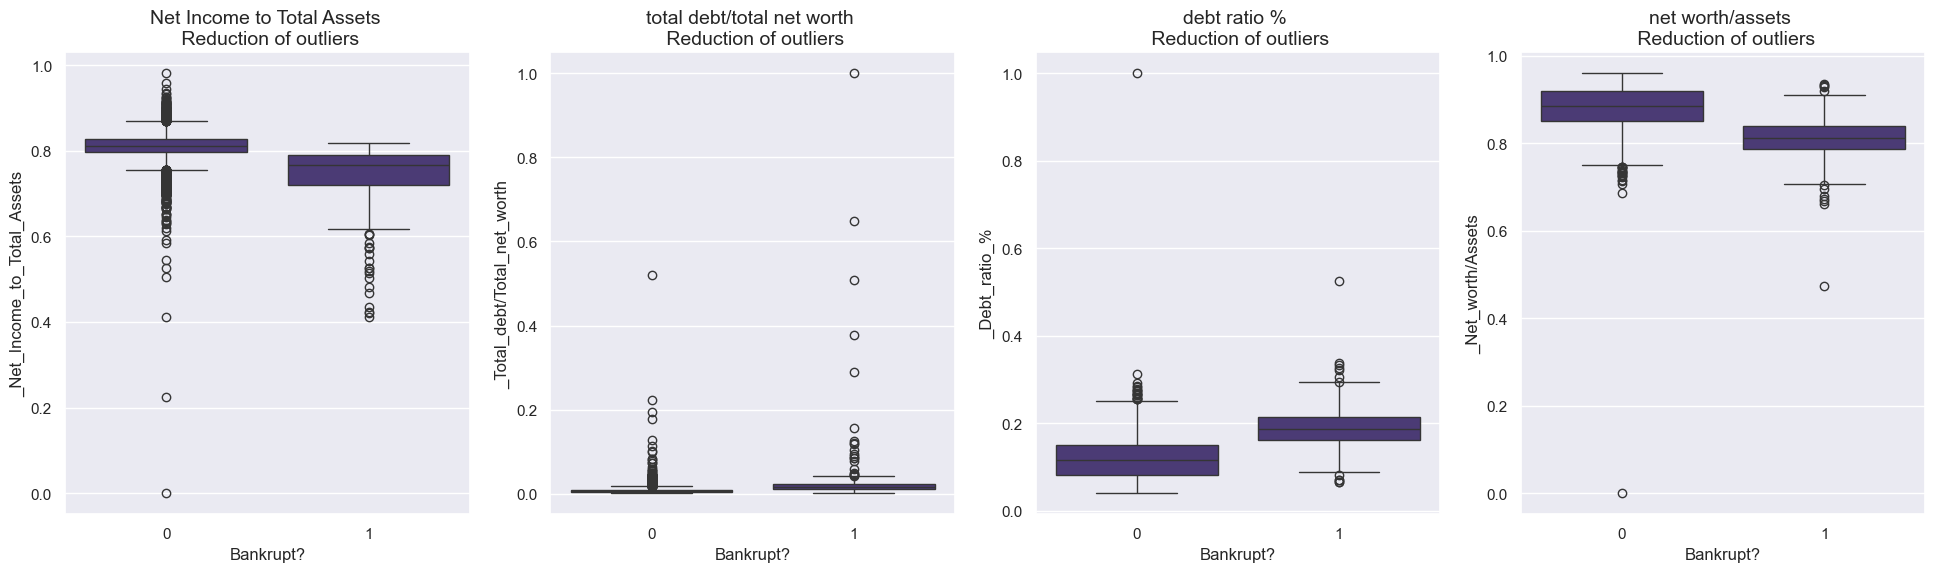

In [32]:
f,(ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,6))

# Boxplots with outliers removed

sns.boxplot(x="Bankrupt?", y="_Net_Income_to_Total_Assets", data=new_df,ax=ax1) 
ax1.set_title("Net Income to Total Assets \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y="_Total_debt/Total_net_worth", data=new_df,ax=ax2) 
ax2.set_title("total debt/total net worth \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y="_Debt_ratio_%", data=new_df,ax=ax3) 
ax3.set_title("debt ratio % \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y='_Net_worth/Assets', data=new_df,ax=ax4) 
ax4.set_title("net worth/assets \n Reduction of outliers", fontsize=14)
        
plt.show()

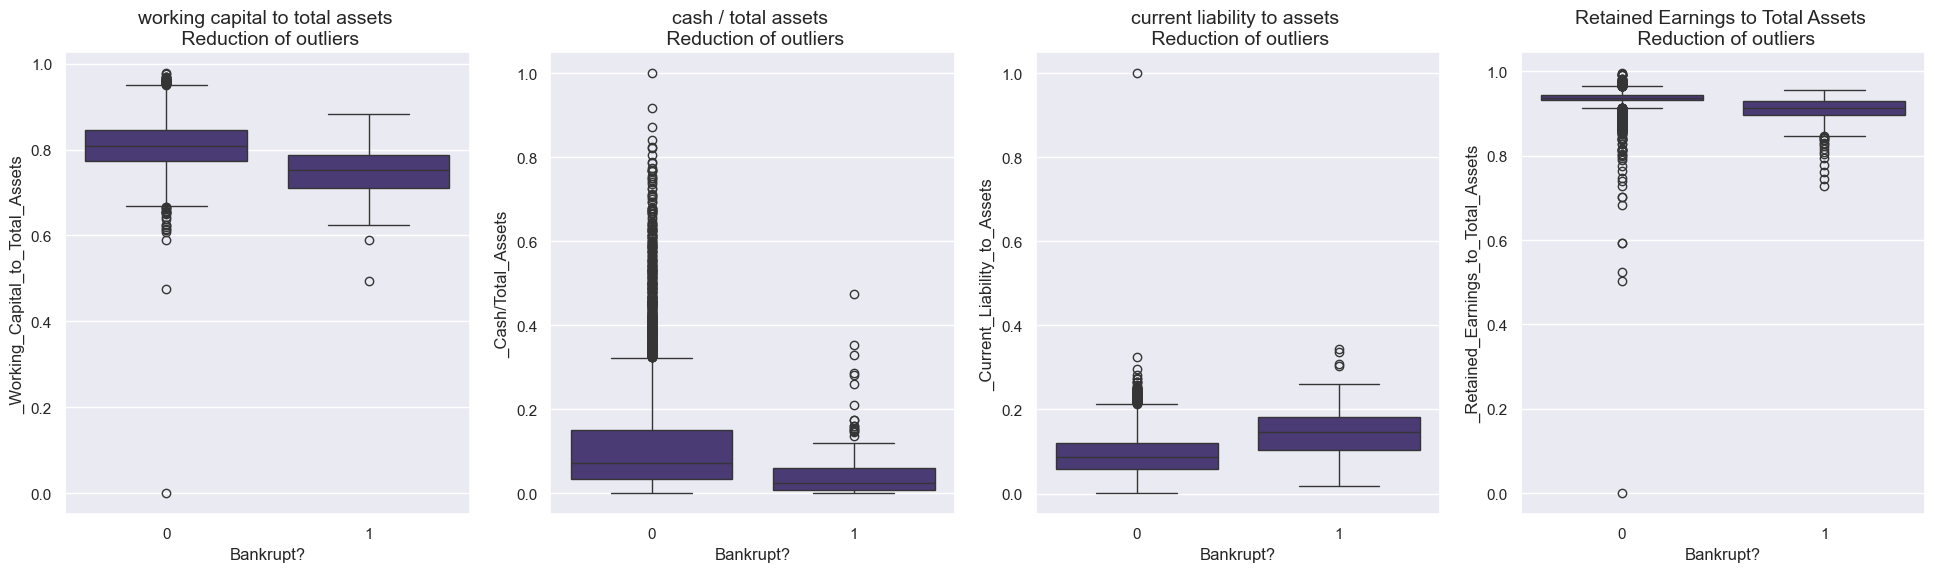

In [33]:
f,(ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,6))

# Boxplots with outliers removed

sns.boxplot(x="Bankrupt?", y='_Working_Capital_to_Total_Assets', data=new_df,ax=ax1) 
ax1.set_title("working capital to total assets \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y='_Cash/Total_Assets', data=new_df,ax=ax2) 
ax2.set_title("cash / total assets \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y='_Current_Liability_to_Assets', data=new_df,ax=ax3) 
ax3.set_title("current liability to assets \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y='_Retained_Earnings_to_Total_Assets', data=new_df,ax=ax4) 
ax4.set_title("Retained Earnings to Total Assets \n Reduction of outliers", fontsize=14)
        
plt.show()

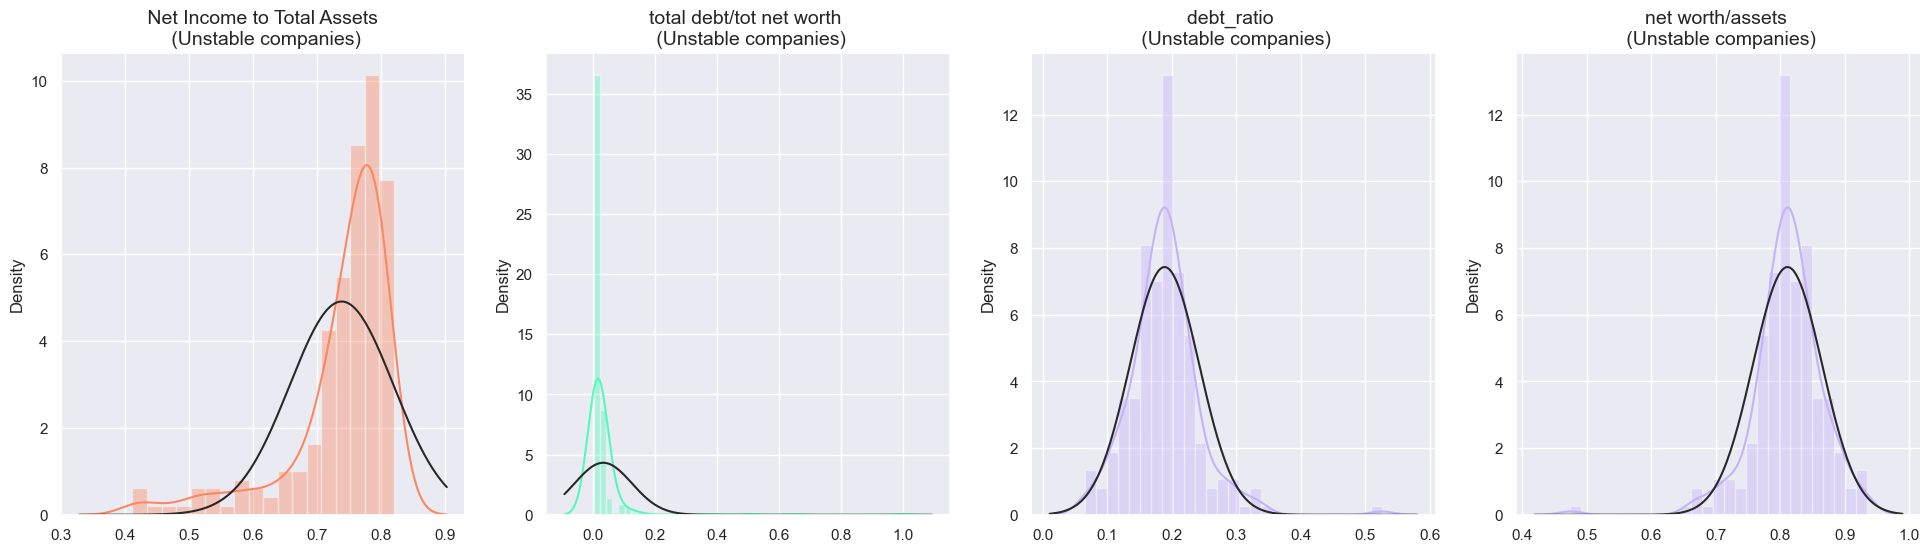

In [34]:
# Plotting the feature distributions for close to bankrputcy companies

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

cash_flow_rate = new_df['_Net_Income_to_Total_Assets'].loc[new_df['Bankrupt?'] == 1].values
sns.distplot(cash_flow_rate,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title(' Net Income to Total Assets \n (Unstable companies)', fontsize=14)

tot_debt_net = new_df['_Total_debt/Total_net_worth'].loc[new_df['Bankrupt?'] == 1].values
sns.distplot(tot_debt_net ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('total debt/tot net worth \n (Unstable companies)', fontsize=14)


debt_ratio = new_df['_Debt_ratio_%'].loc[new_df['Bankrupt?'] == 1].values
sns.distplot(debt_ratio,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('debt_ratio \n (Unstable companies)', fontsize=14)

net_worth_assets = new_df['_Net_worth/Assets'].loc[new_df['Bankrupt?'] == 1].values
sns.distplot(net_worth_assets,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('net worth/assets \n (Unstable companies)', fontsize=14)

plt.show()

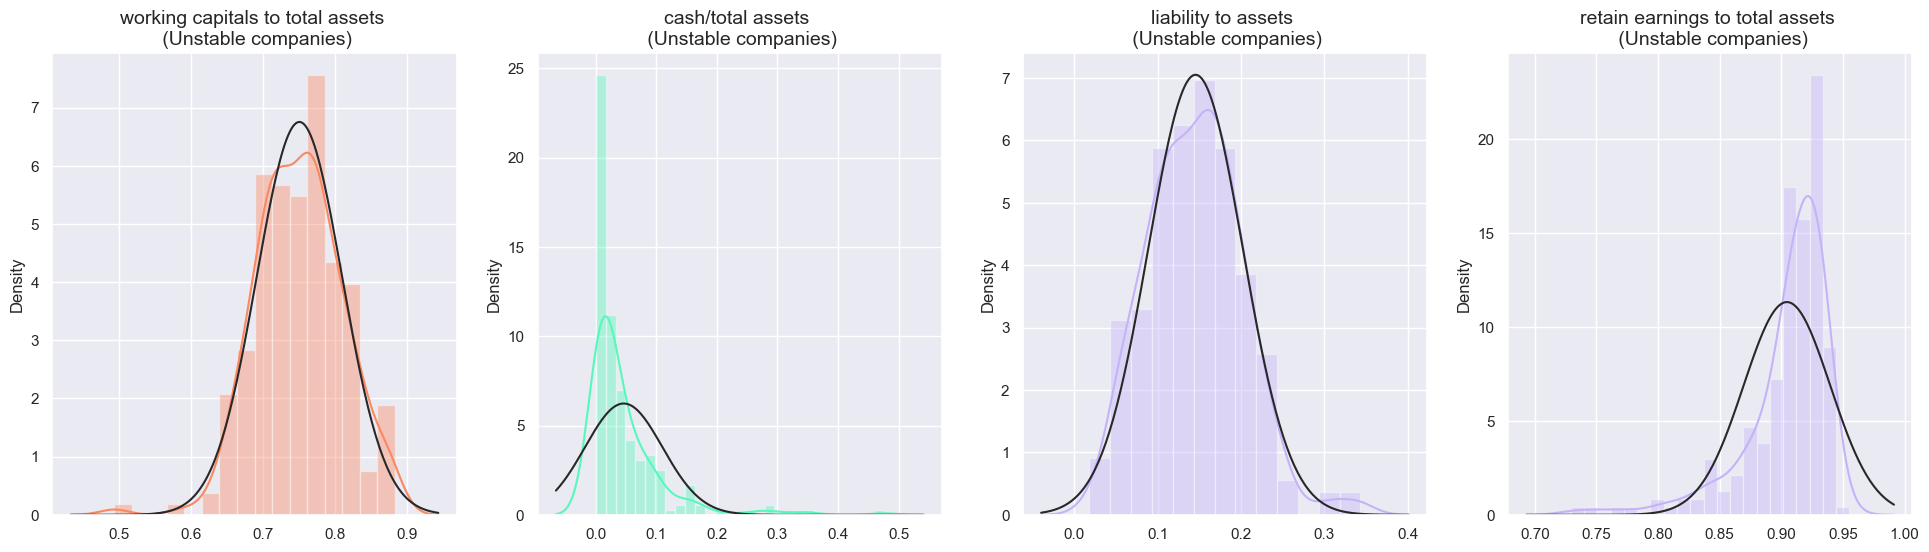

In [35]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

working_cap = new_df['_Working_Capital_to_Total_Assets'].loc[new_df['Bankrupt?'] == 1].values
sns.distplot(working_cap,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('working capitals to total assets \n (Unstable companies)', fontsize=14)

cash_tot_assets = new_df['_Cash/Total_Assets'].loc[new_df['Bankrupt?'] == 1].values
sns.distplot(cash_tot_assets ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('cash/total assets \n (Unstable companies)', fontsize=14)


asset_liab = new_df['_Current_Liability_to_Assets'].loc[new_df['Bankrupt?'] == 1].values
sns.distplot(asset_liab,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('liability to assets \n (Unstable companies)', fontsize=14)

operating_funds = new_df['_Retained_Earnings_to_Total_Assets'].loc[new_df['Bankrupt?'] == 1].values
sns.distplot(operating_funds,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('retain earnings to total assets \n (Unstable companies)', fontsize=14)

plt.show()

In [36]:
#dropping the columns and reducing to 24 with the help of domain knowledge

In [37]:
df1 = df.drop(['_ROA(A)_before_interest_and_%_after_tax', '_ROA(B)_before_interest_and_depreciation_after_tax', '_Realized_Sales_Gross_Margin',
                '_Pre-tax_net_Interest_Rate','_After-tax_net_Interest_Rate','_Non-industry_income_and_expenditure/revenue',
                '_Continuous_interest_rate_(after_tax)', '_Interest-bearing_debt_interest_rate', '_Tax_rate_(A)','_Net_Value_Per_Share_(B)',
                '_Net_Value_Per_Share_(A)','_Net_Value_Per_Share_(C)', '_Persistent_EPS_in_the_Last_Four_Seasons','_Cash_Flow_Per_Share',
                '_Revenue_Per_Share_(Yuan_¥)', '_After-tax_Net_Profit_Growth_Rate','_Regular_Net_Profit_Growth_Rate',
                '_Continuous_Net_Profit_Growth_Rate', '_Total_Asset_Growth_Rate', '_Net_Value_Growth_Rate','_Total_Asset_Return_Growth_Rate_Ratio',
                '_Quick_Ratio', '_Interest_Expense_Ratio','_Long-term_fund_suitability_ratio_(A)','_Contingent_liabilities/Net_worth','_Inventory_and_accounts_receivable/Net_value', '_Total_Asset_Turnover',
                '_Accounts_Receivable_Turnover', '_Average_Collection_Days','_Inventory_Turnover_Rate_(times)', '_Fixed_Assets_Turnover_Frequency',
                '_Net_Worth_Turnover_Rate_(times)', '_Revenue_per_person','_Operating_profit_per_person', '_Allocation_rate_per_person',
                '_Working_Capital_to_Total_Assets', '_Quick_Assets/Total_Assets','_Current_Assets/Total_Assets', '_Cash/Total_Assets',
                '_Quick_Assets/Current_Liability', '_Cash/Current_Liability','_Current_Liability_to_Assets', '_Operating_Funds_to_Liability',
                '_Inventory/Working_Capital', '_Inventory/Current_Liability','_Current_Liabilities/Liability', '_Working_Capital/Equity',
                '_Current_Liabilities/Equity', '_Long-term_Liability_to_Current_Assets','_Retained_Earnings_to_Total_Assets', '_Total_income/Total_expense',
                '_Total_expense/Assets', '_Current_Asset_Turnover_Rate','_Quick_Asset_Turnover_Rate', '_Working_capitcal_Turnover_Rate',
                '_Cash_Turnover_Rate', '_Cash_Flow_to_Sales', '_Fixed_Assets_to_Assets','_Current_Liability_to_Liability', '_Current_Liability_to_Equity',
                '_Equity_to_Long-term_Liability', '_Cash_Flow_to_Total_Assets','_Cash_Flow_to_Liability', '_CFO_to_Assets', '_Cash_Flow_to_Equity',
                '_Current_Liability_to_Current_Assets', '_Liability-Assets_Flag','_Net_Income_to_Total_Assets', '_Total_assets_to_GNP_price','_No-credit_Interval', '_Gross_Profit_to_Sales',
                '_Net_Income_Flag'],axis = 1)
      

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 24 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1   _ROA(C)_before_interest_and_depreciation_before_interest  6819 non-null   float64
 2   _Operating_Gross_Margin                                   6819 non-null   float64
 3   _Operating_Profit_Rate                                    6819 non-null   float64
 4   _Operating_Expense_Rate                                   6819 non-null   float64
 5   _Research_and_development_expense_rate                    6819 non-null   float64
 6   _Cash_flow_rate                                           6819 non-null   float64
 7   _Operating_Profit_Per_Share_(Yuan_¥)                      6819 non-null   float64
 8   _Per_Share_Net_pro

In [39]:
df1.rename(columns={'_ROA(C)_before_interest_and_depreciation_before_interest':'ROA_C'},inplace=True)
df1.rename(columns={'_Operating_Gross_Margin':'Operating_Gross_Margin'},inplace=True)
df1.rename(columns={'_Operating_Profit_Rate':'Operating_Profit_Rate'},inplace=True)
df1.rename(columns={'_Operating_Expense_Rate':'Operating_Expense_Rate'},inplace=True)
df1.rename(columns={'_Research_and_development_expense_rate':'RDER'},inplace=True)
df1.rename(columns={'_Cash_flow_rate':'Cash_flow_rate'},inplace=True)
df1.rename(columns={'_Operating_Profit_Per_Share_(Yuan_¥)':'OPPS'},inplace=True)

In [40]:
df1.rename(columns={'_Per_Share_Net_profit_before_tax_(Yuan_¥)':'PSNPBT'},inplace=True)
df1.rename(columns={'_Realized_Sales_Gross_Profit_Growth_Rate':'RSGPGR'},inplace=True)
df1.rename(columns={'_Operating_Profit_Growth_Rate':'OPGR'},inplace=True)
df1.rename(columns={'_Cash_Reinvestment_%':'Cash_Reinvestment '},inplace=True)
df1.rename(columns={'_Current_Ratio':'Current_Ratio'},inplace=True)
df1.rename(columns={'_Total_debt/Total_net_worth':'TD_TNW'},inplace=True)
df1.rename(columns={'_Debt_ratio_%':'Debt_ratio'},inplace=True)

In [41]:
df1.rename(columns={'_Net_worth/Assets':'Net_worth_Assets'},inplace=True)
df1.rename(columns={'_Borrowing_dependency':'Borrowing_dependency'},inplace=True)
df1.rename(columns={'_Operating_profit/Paid-in_capital':'OP_PC'},inplace=True)
df1.rename(columns={'_Net_profit_before_tax/Paid-in_capital':'NPBT_PC'},inplace=True)
df1.rename(columns={'_Net_Income_to_Stockholder\'s_Equity': 'NI_SE'},inplace=True)
df1.rename(columns={'_Liability_to_Equity':'Liability_to_Equity'},inplace=True)
df1.rename(columns={'_Degree_of_Financial_Leverage_(DFL)':'DFL'},inplace=True)
df1.rename(columns={'_Interest_Coverage_Ratio_(Interest_expense_to_EBIT)':'ICR_IE_EBIT'},inplace=True)
df1.rename(columns={'_Equity_to_Liability':'Equity_to_Liability'},inplace=True)

In [42]:
df1

Bankrupt?     ROA_C  Operating_Gross_Margin  Operating_Profit_Rate  \
0             1  0.370594                0.601457               0.998969   
1             1  0.464291                0.610235               0.998946   
2             1  0.426071                0.601450               0.998857   
3             1  0.399844                0.583541               0.998700   
4             1  0.465022                0.598783               0.998973   
...         ...       ...                     ...                    ...   
6814          0  0.493687                0.604455               0.998992   
6815          0  0.475162                0.598308               0.998992   
6816          0  0.472725                0.610444               0.998984   
6817          0  0.506264                0.607850               0.999074   
6818          0  0.493053                0.627409               0.998080   

      Operating_Expense_Rate          RDER  Cash_flow_rate      OPPS  \
0               1.256969e-04  0.000000e+00        0.458143  0.095921   
1               2.897851e-04  0.000000e+00        0.461867  0.093722   
2               2.361297e-04  2.550000e+07        0.458521  0.092338   
3               1.078888e-04  0.000000e+00        0.465705  0.077762   
4               7.890000e+09  0.000000e+00        0.462746  0.096898   
...                      ...           ...             ...       ...   
6814            1.510213e-04  4.500000e+09        0.463734  0.098200   
6815            5.220000e+09  1.440000e+09        0.461978  0.098608   
6816            2.509312e-04  1.039086e-04        0.472189  0.100073   
6817            1.236154e-04  2.510000e+09        0.476123  0.111799   
6818            1.431695e-03  0.000000e+00        0.427721  0.092501   

        PSNPBT    RSGPGR  ...  Debt_ratio  Net_worth_Assets  \
0     0.138736  0.022102  ...    0.207576          0.792424   
1     0.169918  0.022080  ...    0.171176          0.828824   
2     0.142803  0.022760  ...    0.207516          0.792484   
3     0.148603  0.022046  ...    0.151465          0.848535   
4     0.168412  0.022096  ...    0.106509          0.893491   
...        ...       ...  ...         ...               ...   
6814  0.172102  0.022374  ...    0.124618          0.875382   
6815  0.172780  0.022159  ...    0.099253          0.900747   
6816  0.173232  0.022068  ...    0.038939          0.961061   
6817  0.185584  0.022350  ...    0.086979          0.913021   
6818  0.182119  0.025316  ...    0.014149          0.985851   

      Borrowing_dependency     OP_PC   NPBT_PC     NI_SE  Liability_to_Equity  \
0                 0.390284  0.095885  0.137757  0.827890             0.290202   
1                 0.376760  0.093743  0.168962  0.839969             0.283846   
2                 0.379093  0.092318  0.148036  0.836774             0.290189   
3                 0.379743  0.077727  0.147561  0.834697             0.281721   
4                 0.375025  0.096927  0.167461  0.839973             0.278514   
...                    ...       ...       ...       ...                  ...   
6814              0.373823  0.098222  0.171111  0.840359             0.279606   
6815              0.372505  0.098572  0.171805  0.840306             0.278132   
6816              0.369637  0.100103  0.172287  0.840138             0.275789   
6817              0.369649  0.111722  0.182498  0.841084             0.277547   
6818              0.370049  0.092465  0.179911  0.841019             0.275114   

           DFL  ICR_IE_EBIT  Equity_to_Liability  
0     0.026601     0.564050             0.016469  
1     0.264577     0.570175             0.020794  
2     0.026555     0.563706             0.016474  
3     0.026697     0.564663             0.023982  
4     0.024752     0.575617             0.035490  
...        ...          ...                  ...  
6814  0.027064     0.566193             0.029890  
6815  0.027009     0.566018             0.038284  
6816  0.026791     0.565158            

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Bankrupt?               6819 non-null   int64  
 1   ROA_C                   6819 non-null   float64
 2   Operating_Gross_Margin  6819 non-null   float64
 3   Operating_Profit_Rate   6819 non-null   float64
 4   Operating_Expense_Rate  6819 non-null   float64
 5   RDER                    6819 non-null   float64
 6   Cash_flow_rate          6819 non-null   float64
 7   OPPS                    6819 non-null   float64
 8   PSNPBT                  6819 non-null   float64
 9   RSGPGR                  6819 non-null   float64
 10  OPGR                    6819 non-null   float64
 11  Cash_Reinvestment       6819 non-null   float64
 12  Current_Ratio           6819 non-null   float64
 13  TD_TNW                  6819 non-null   float64
 14  Debt_ratio              6819 non-null   

In [44]:
df1.corr()

Bankrupt?     ROA_C  Operating_Gross_Margin  \
Bankrupt?                1.000000 -0.260807               -0.100043   
ROA_C                   -0.260807  1.000000                0.334719   
Operating_Gross_Margin  -0.100043  0.334719                1.000000   
Operating_Profit_Rate   -0.000230  0.035725                0.005745   
Operating_Expense_Rate  -0.006083  0.066869               -0.206353   
RDER                    -0.024232  0.106461               -0.016976   
Cash_flow_rate          -0.072356  0.323482                0.341188   
OPPS                    -0.142051  0.687201                0.267944   
PSNPBT                  -0.201395  0.750564                0.247789   
RSGPGR                  -0.000458  0.000591                0.014172   
OPGR                    -0.015168  0.036511                0.022867   
Cash_Reinvestment       -0.051345  0.296158                0.122676   
Current_Ratio           -0.002211  0.013196                0.024945   
TD_TNW                   0.012314 -0.022208               -0.022360   
Debt_ratio               0.250161 -0.261427               -0.245460   
Net_worth_Assets        -0.250161  0.261427                0.245460   
Borrowing_dependency     0.176543 -0.161671               -0.085733   
OP_PC                   -0.141111  0.685028                0.267411   
NPBT_PC                 -0.207857  0.753339                0.248104   
NI_SE                   -0.180987  0.274287                0.075304   
Liability_to_Equity      0.166812 -0.143629               -0.085434   
DFL                      0.010508 -0.016575               -0.011806   
ICR_IE_EBIT             -0.005509  0.010573               -0.001167   
Equity_to_Liability     -0.083048  0.052416                0.120029   

                        Operating_Profit_Rate  Operating_Expense_Rate  \
Bankrupt?                           -0.000230               -0.006083   
ROA_C                                0.035725                0.066869   
Operating_Gross_Margin               0.005745               -0.206353   
Operating_Profit_Rate                1.000000                0.013246   
Operating_Expense_Rate               0.013246                1.000000   
RDER                                 0.016387               -0.060386   
Cash_flow_rate                       0.023051               -0.020147   
OPPS                                 0.022397                0.071799   
PSNPBT                               0.020219                0.081428   
RSGPGR                               0.000831               -0.008170   
OPGR                                 0.004952                0.013374   
Cash_Reinvestment                    0.014955               -0.003016   
Current_Ratio                        0.000833               -0.007464   
TD_TNW                              -0.001507               -0.016164   
Debt_ratio                           0.010397                0.143833   
Net_worth_Assets                    -0.010397               -0.143833   
Borrowing_dependency                 0.001092                0.023977   
OP_PC                                0.022160                0.071972   
NPBT_PC                              0.020015                0.082923   
NI_SE                                0.006216                0.029733   
Liability_to_Equity                  0.001541                0.034809   
DFL                                  0.000935                0.013577   
ICR_IE_EBIT                          0.000393                0.006232   
Equity_to_Liability                 -0.017071               -0.120763   

                            RDER  Cash_flow_rate      OPPS    PSNPBT  \
Bankrupt?              -0.024232       -0.072356 -0.142051 -0.201395   
ROA_C                   0.106461        0.323482  0.687201  0.750564   
Operating_Gross_Margin -0.016976        0.341188  0.267944  0.247789   
Operating_Profit_Rate   0.016387        0.023051  0.022397  0.020219   
Operating_Expense_Rate -0.060386       -0.020147  0.071799  0.

In [45]:
df1.describe()

Bankrupt?        ROA_C  Operating_Gross_Margin  \
count  6819.000000  6819.000000             6819.000000   
mean      0.032263     0.505180                0.607948   
std       0.176710     0.060686                0.016934   
min       0.000000     0.000000                0.000000   
25%       0.000000     0.476527                0.600445   
50%       0.000000     0.502706                0.605997   
75%       0.000000     0.535563                0.613914   
max       1.000000     1.000000                1.000000   

       Operating_Profit_Rate  Operating_Expense_Rate          RDER  \
count            6819.000000            6.819000e+03  6.819000e+03   
mean                0.998755            1.995347e+09  1.950427e+09   
std                 0.013010            3.237684e+09  2.598292e+09   
min                 0.000000            0.000000e+00  0.000000e+00   
25%                 0.998969            1.566874e-04  1.281880e-04   
50%                 0.999022            2.777589e-04  5.090000e+08   
75%                 0.999095            4.145000e+09  3.450000e+09   
max                 1.000000            9.990000e+09  9.980000e+09   

       Cash_flow_rate         OPPS       PSNPBT       RSGPGR  ...  \
count     6819.000000  6819.000000  6819.000000  6819.000000  ...   
mean         0.467431     0.109091     0.184361     0.022408  ...   
std          0.017036     0.027942     0.033180     0.012079  ...   
min          0.000000     0.000000     0.000000     0.000000  ...   
25%          0.461558     0.096083     0.170370     0.022065  ...   
50%          0.465080     0.104226     0.179709     0.022102  ...   
75%          0.471004     0.116155     0.193493     0.022153  ...   
max          1.000000     1.000000     1.000000     1.000000  ...   

        Debt_ratio  Net_worth_Assets  Borrowing_dependency        OP_PC  \
count  6819.000000       6819.000000           6819.000000  6819.000000   
mean      0.113177          0.886823              0.374654     0.108977   
std       0.053920          0.053920              0.016286     0.027782   
min       0.000000          0.000000              0.000000     0.000000   
25%       0.072891          0.851196              0.370168     0.096105   
50%       0.111407          0.888593              0.372624     0.104133   
75%       0.148804          0.927109              0.376271     0.115927   
max       1.000000          1.000000              1.000000     1.000000   

           NPBT_PC        NI_SE  Liability_to_Equity          DFL  \
count  6819.000000  6819.000000          6819.000000  6819.000000   
mean      0.182715     0.840402             0.280365     0.027541   
std       0.030785     0.014523             0.014463     0.015668   
min       0.000000     0.000000             0.000000     0.000000   
25%       0.169376     0.840115             0.276944     0.026791   
50%       0.178456     0.841179             0.278778     0.026808   
75%       0.191607     0.842357             0.281449     0.026913   
max       1.000000     1.000000             1.000000     1.000000   

       ICR_IE_EBIT  Equity_to_Liability  
count  6819.000000          6819.000000  
mean      0.565358             0.047578  
std       0.013214             0.050014  
min       0.000000             0.000000  
25%       0.565158             0.024477  
50%       0.565252             0.033798  
75%       0.565725             0.052838  
max       1.000000             1.000000  

[8 rows x 24 columns]

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Bankrupt?               6819 non-null   int64  
 1   ROA_C                   6819 non-null   float64
 2   Operating_Gross_Margin  6819 non-null   float64
 3   Operating_Profit_Rate   6819 non-null   float64
 4   Operating_Expense_Rate  6819 non-null   float64
 5   RDER                    6819 non-null   float64
 6   Cash_flow_rate          6819 non-null   float64
 7   OPPS                    6819 non-null   float64
 8   PSNPBT                  6819 non-null   float64
 9   RSGPGR                  6819 non-null   float64
 10  OPGR                    6819 non-null   float64
 11  Cash_Reinvestment       6819 non-null   float64
 12  Current_Ratio           6819 non-null   float64
 13  TD_TNW                  6819 non-null   float64
 14  Debt_ratio              6819 non-null   

In [47]:
df1['Bankrupt?'].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

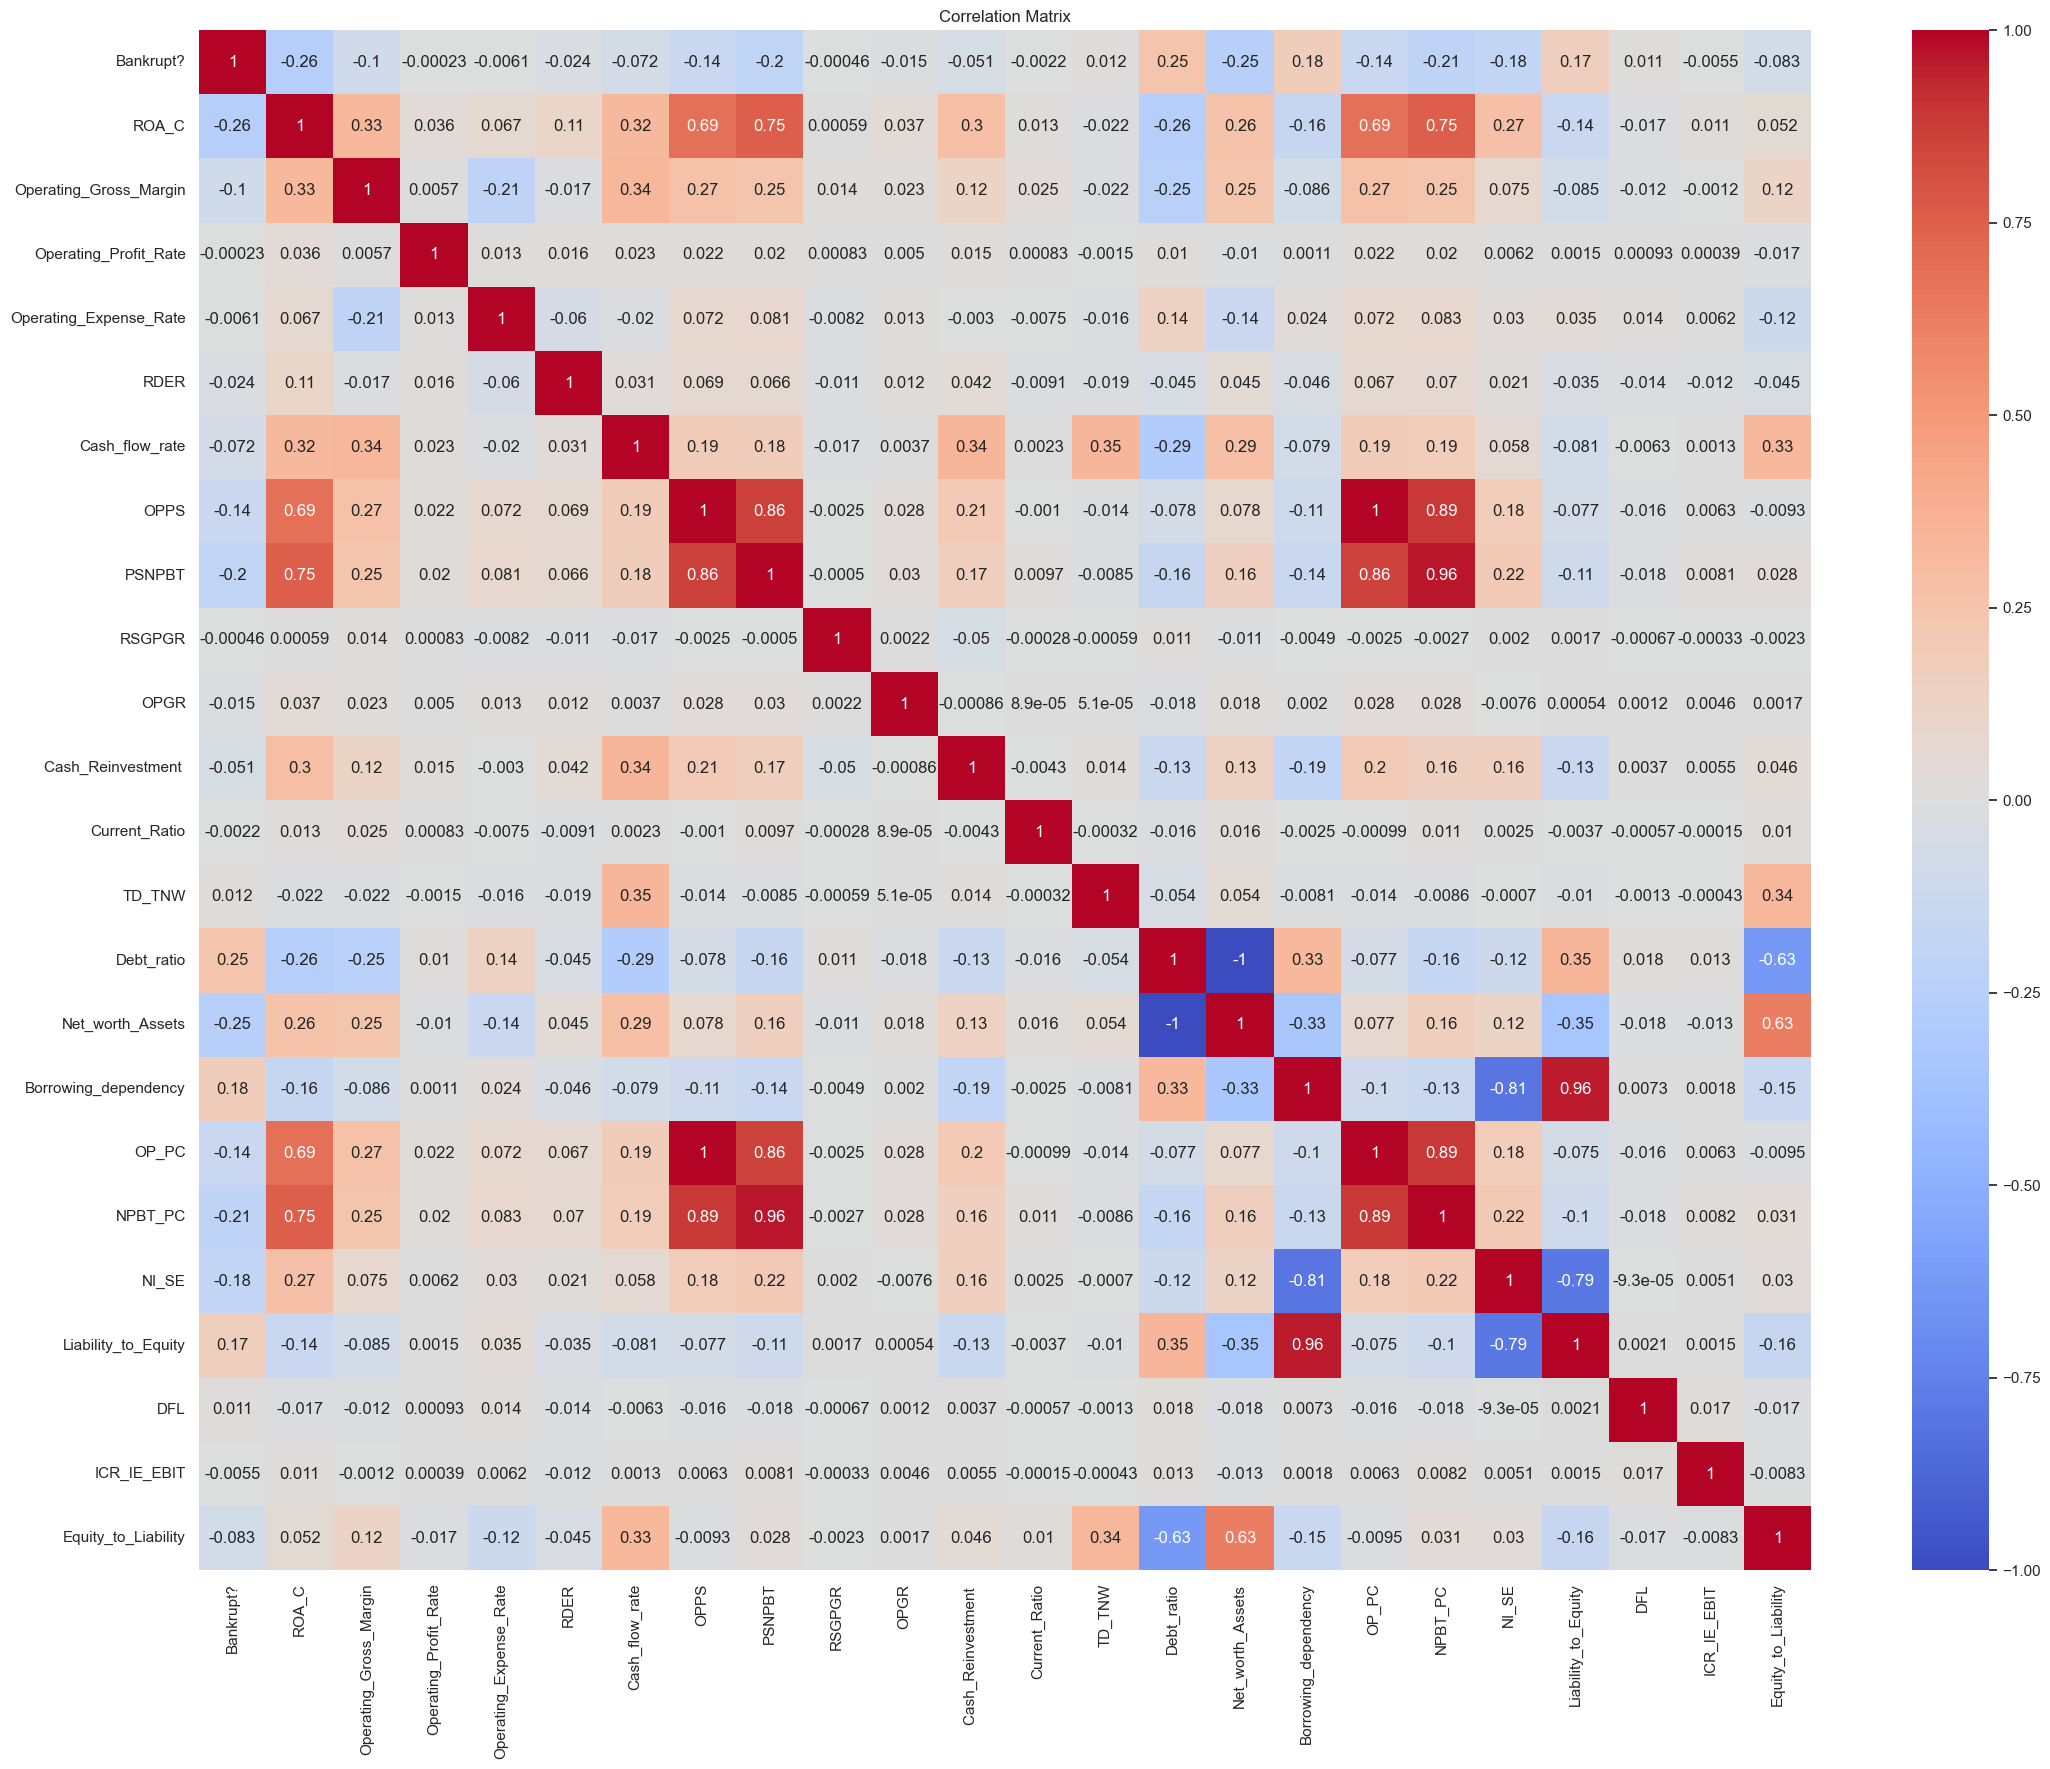

In [48]:
corr1 = df1.corr()
plt.figure(figsize=(26, 20))
sns.heatmap(corr1, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# model Building

In [49]:
x = df1.drop(['Bankrupt?'], axis = 1)
y = df1['Bankrupt?']

In [50]:
x

ROA_C  Operating_Gross_Margin  Operating_Profit_Rate  \
0     0.370594                0.601457               0.998969   
1     0.464291                0.610235               0.998946   
2     0.426071                0.601450               0.998857   
3     0.399844                0.583541               0.998700   
4     0.465022                0.598783               0.998973   
...        ...                     ...                    ...   
6814  0.493687                0.604455               0.998992   
6815  0.475162                0.598308               0.998992   
6816  0.472725                0.610444               0.998984   
6817  0.506264                0.607850               0.999074   
6818  0.493053                0.627409               0.998080   

      Operating_Expense_Rate          RDER  Cash_flow_rate      OPPS  \
0               1.256969e-04  0.000000e+00        0.458143  0.095921   
1               2.897851e-04  0.000000e+00        0.461867  0.093722   
2               2.361297e-04  2.550000e+07        0.458521  0.092338   
3               1.078888e-04  0.000000e+00        0.465705  0.077762   
4               7.890000e+09  0.000000e+00        0.462746  0.096898   
...                      ...           ...             ...       ...   
6814            1.510213e-04  4.500000e+09        0.463734  0.098200   
6815            5.220000e+09  1.440000e+09        0.461978  0.098608   
6816            2.509312e-04  1.039086e-04        0.472189  0.100073   
6817            1.236154e-04  2.510000e+09        0.476123  0.111799   
6818            1.431695e-03  0.000000e+00        0.427721  0.092501   

        PSNPBT    RSGPGR      OPGR  ...  Debt_ratio  Net_worth_Assets  \
0     0.138736  0.022102  0.848195  ...    0.207576          0.792424   
1     0.169918  0.022080  0.848088  ...    0.171176          0.828824   
2     0.142803  0.022760  0.848094  ...    0.207516          0.792484   
3     0.148603  0.022046  0.848005  ...    0.151465          0.848535   
4     0.168412  0.022096  0.848258  ...    0.106509          0.893491   
...        ...       ...       ...  ...         ...               ...   
6814  0.172102  0.022374  0.848205  ...    0.124618          0.875382   
6815  0.172780  0.022159  0.848245  ...    0.099253          0.900747   
6816  0.173232  0.022068  0.847978  ...    0.038939          0.961061   
6817  0.185584  0.022350  0.854064  ...    0.086979          0.913021   
6818  0.182119  0.025316  0.848053  ...    0.014149          0.985851   

      Borrowing_dependency     OP_PC   NPBT_PC     NI_SE  Liability_to_Equity  \
0                 0.390284  0.095885  0.137757  0.827890             0.290202   
1                 0.376760  0.093743  0.168962  0.839969             0.283846   
2                 0.379093  0.092318  0.148036  0.836774             0.290189   
3                 0.379743  0.077727  0.147561  0.834697             0.281721   
4                 0.375025  0.096927  0.167461  0.839973             0.278514   
...                    ...       ...       ...       ...                  ...   
6814              0.373823  0.098222  0.171111  0.840359             0.279606   
6815              0.372505  0.098572  0.171805  0.840306             0.278132   
6816              0.369637  0.100103  0.172287  0.840138             0.275789   
6817              0.369649  0.111722  0.182498  0.841084             0.277547   
6818              0.370049  0.092465  0.179911  0.841019             0.275114   

           DFL  ICR_IE_EBIT  Equity_to_Liability  
0     0.026601     0.564050             0.016469  
1     0.264577     0.570175             0.020794  
2     0.026555     0.563706             0.016474  
3     0.026697     0.564663             0.023982  
4     0.024752     0.575617             0.035490  
...        ...          ...                  ...  
6814  0.027064     0.566193             0.029890  
6815  0.027009     0.566018             0.038284  
6816  0.026791     0.565158             0.097649  
681

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [52]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [53]:
y_resampled

0       0
1       0
2       0
3       0
4       0
       ..
9257    1
9258    1
9259    1
9260    1
9261    1
Name: Bankrupt?, Length: 9262, dtype: int64

In [54]:
print(f"After SMOTE: {Counter(y_resampled)}")

After SMOTE: Counter({0: 4631, 1: 4631})


In [55]:
#RandomForestClassifier

In [56]:
model = RandomForestClassifier(random_state=42)
model.fit(x_resampled,y_resampled)

RandomForestClassifier(random_state=42)

In [57]:
ypred = model.predict(x_test)
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1968
           1       0.35      0.62      0.44        78

    accuracy                           0.94      2046
   macro avg       0.66      0.78      0.71      2046
weighted avg       0.96      0.94      0.95      2046



In [59]:
print("Random Forest classifier Accuracy:", accuracy_score(y_test, ypred))

Random Forest classifier Accuracy: 0.9408602150537635


In [60]:
print(classification_report(y_test, ypred))
print("Random Forest AUC-ROC:", roc_auc_score(y_test, model.predict_proba(x_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1968
           1       0.35      0.62      0.44        78

    accuracy                           0.94      2046
   macro avg       0.66      0.78      0.71      2046
weighted avg       0.96      0.94      0.95      2046

Random Forest AUC-ROC: 0.9342981290389827


In [61]:
#XGB

In [62]:
model1 = xgb.XGBClassifier(random_state=42)

# Train the model
model1.fit(x_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [63]:
ypred1 = model1.predict(x_test)
ypred1

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
print(classification_report(y_test, ypred1))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1968
           1       0.42      0.55      0.48        78

    accuracy                           0.95      2046
   macro avg       0.70      0.76      0.73      2046
weighted avg       0.96      0.95      0.96      2046



In [65]:
print("XGBClassifier accuracy:", accuracy_score(y_test, ypred1))

XGBClassifier accuracy: 0.9540566959921799


In [66]:
print(classification_report(y_test, ypred1))
print("Random Forest AUC-ROC:", roc_auc_score(y_test, model1.predict_proba(x_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1968
           1       0.42      0.55      0.48        78

    accuracy                           0.95      2046
   macro avg       0.70      0.76      0.73      2046
weighted avg       0.96      0.95      0.96      2046

Random Forest AUC-ROC: 0.8996443089430894


In [67]:
#lgb

In [68]:
model2 = lgb.LGBMClassifier(force_col_wise = True)
model2.fit(x_resampled,y_resampled)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4631, number of negative: 4631
[LightGBM] [Info] Total Bins 5865
[LightGBM] [Info] Number of data points in the train set: 9262, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(force_col_wise=True)

In [69]:
ypred2 = model2.predict(x_test)
ypred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
print(classification_report(y_test, ypred2))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1968
           1       0.40      0.62      0.48        78

    accuracy                           0.95      2046
   macro avg       0.69      0.79      0.73      2046
weighted avg       0.96      0.95      0.95      2046



In [71]:
print("LGBMClassifier accuracy:", accuracy_score(y_test, ypred2))

LGBMClassifier accuracy: 0.9496578690127078


In [72]:
print(classification_report(y_test, ypred2))
print("Random Forest AUC-ROC:", roc_auc_score(y_test, model2.predict_proba(x_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1968
           1       0.40      0.62      0.48        78

    accuracy                           0.95      2046
   macro avg       0.69      0.79      0.73      2046
weighted avg       0.96      0.95      0.95      2046

Random Forest AUC-ROC: 0.9260279862414009


In [73]:
#SVM

In [74]:
model3 = SVC()
model3.fit(x_resampled, y_resampled)

SVC()

In [75]:
ypred3 = model3.predict(x_test)
ypred3

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [76]:
print(classification_report(y_test, ypred3))

              precision    recall  f1-score   support

           0       0.96      0.42      0.58      1968
           1       0.04      0.59      0.07        78

    accuracy                           0.43      2046
   macro avg       0.50      0.50      0.33      2046
weighted avg       0.93      0.43      0.56      2046



In [77]:
print("SVM accuracy:", accuracy_score(y_test, ypred3))

SVM accuracy: 0.4252199413489736


In [78]:
#GradientBoosting Classifier

In [79]:
model4 = GradientBoostingClassifier()
model4.fit(x_resampled,y_resampled)

GradientBoostingClassifier()

In [80]:
ypred4 = model4.predict(x_test)
ypred4

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [81]:
print(classification_report(y_test, ypred4))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1968
           1       0.26      0.78      0.39        78

    accuracy                           0.91      2046
   macro avg       0.62      0.85      0.67      2046
weighted avg       0.96      0.91      0.93      2046



In [82]:
print("Gradient Boosting accuracy:", accuracy_score(y_test, ypred4))

Gradient Boosting accuracy: 0.9056695992179863


In [83]:
print(classification_report(y_test, ypred4))
print("Random Forest AUC-ROC:", roc_auc_score(y_test, model4.predict_proba(x_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1968
           1       0.26      0.78      0.39        78

    accuracy                           0.91      2046
   macro avg       0.62      0.85      0.67      2046
weighted avg       0.96      0.91      0.93      2046

Random Forest AUC-ROC: 0.923982436939754


In [84]:
#Decision Tree

In [85]:
model5 = DecisionTreeClassifier()
model5.fit(x_resampled,y_resampled)

DecisionTreeClassifier()

In [86]:
ypred5 = model5.predict(x_test)
ypred5

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [87]:
print(classification_report(y_test, ypred5))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1968
           1       0.31      0.54      0.39        78

    accuracy                           0.94      2046
   macro avg       0.64      0.75      0.68      2046
weighted avg       0.96      0.94      0.94      2046



In [88]:
print("LGBMClassifier accuracy:", accuracy_score(y_test, ypred5))

LGBMClassifier accuracy: 0.9359726295210166


In [89]:
print(classification_report(y_test, ypred5))
print("Random Forest AUC-ROC:", roc_auc_score(y_test, model5.predict_proba(x_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1968
           1       0.31      0.54      0.39        78

    accuracy                           0.94      2046
   macro avg       0.64      0.75      0.68      2046
weighted avg       0.96      0.94      0.94      2046

Random Forest AUC-ROC: 0.7450945903689806


# Final Model

In [90]:
transformer = ColumnTransformer(transformers=[
    ('tnf1',StandardScaler(),[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
], remainder='passthrough')

In [91]:
model = Pipeline(steps=[('transformer', transformer),
                        ('model',RandomForestClassifier(n_estimators=100,random_state=42))])

In [92]:
model.fit(x_resampled,y_resampled)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1', StandardScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22])])),
                ('model', RandomForestClassifier(random_state=42))])

In [93]:
ypred = model.predict(x_test)
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [94]:
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))

[[1879   89]
 [  30   48]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1968
           1       0.35      0.62      0.45        78

    accuracy                           0.94      2046
   macro avg       0.67      0.79      0.71      2046
weighted avg       0.96      0.94      0.95      2046



In [95]:
model

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1', StandardScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22])])),
                ('model', RandomForestClassifier(random_state=42))])

In [96]:
import pickle
pickle.dump(model,open('model.pkl','wb'))